<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [1]:
# Installing the libraries with the specified version.
#!pip3 install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user
#!pip3 install tensorflow==2.16.1

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

2024-06-05 19:07:29.059233: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading the dataset

In [3]:
#load the dataset
churn = pd.read_csv("churn.csv")

## Data Overview

In [4]:
# view the first 5 rows of the data
churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
# view the last 5 rows of the data
churn.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

* Age, Balance, Tenure, CreditScore, and EstimatedSalary will probably have to be normalized.
* Geography and Gender will have to be one hot encoded to be of use in our model.

In [6]:
churn.shape

(10000, 14)

10000 rows and 14 columns

In [7]:
#Check the data types of the columns for the dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#Checking the Statistical Summary
churn.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [9]:
# check for missing values in the data, express as %
round(churn.isnull().sum() / churn.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

* No missing values.

In [10]:
# check for duplicate values
churn.duplicated().sum()

0

* No duplicate values.

In [11]:
#Checking for unique values for each of the column
churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* Age has only 70 unique values, likely meaning large groupings of similar ages.
* Geography and Gender look to be categorical in nature.
* We have many continuous variables like CreditScore, Balance, EstimatedSalary, etc.
* RowNumber consists of uniques ID for each row and will not add value to the modeling
* CustomerId consists of uniques ID for customers and will not add value to the modeling
* Surname consists of last names customers and will not add value to this modeling

In [12]:
# Can see that several of these columns have limited data types, so would be better as categories
# Converting the data type of columns with category like data to 'category'

# don't convert Exited, since we will remove later and its the target var.
category_col = ['Geography','Gender']

churn[category_col] = churn[category_col].astype('category')

# take a look at the data types after conversion
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  int64   
 11  IsActiveMember   10000 non-null  int64   
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(9), object(1)
memory usage: 957.4+ KB


In [13]:
# view the statistical summary of the non-numerical columns in the data
churn.describe(exclude=np.number).T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [14]:
var_col = [
    "CreditScore",
    "Geography",
    "Gender",
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "HasCrCard",
    "IsActiveMember",
    "EstimatedSalary",
    "Exited"
]

i=0
#summarize all values of categories
for column in var_col:
    print(var_col[i])
    print("-"*55)
    print(churn[column].value_counts())
    print("\n")
    i+=1
    

CreditScore
-------------------------------------------------------
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
351      1
365      1
382      1
373      1
419      1
Name: count, Length: 460, dtype: int64


Geography
-------------------------------------------------------
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


Gender
-------------------------------------------------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64


Age
-------------------------------------------------------
Age
37    478
38    477
35    474
36    456
34    447
     ... 
84      2
88      1
82      1
85      1
83      1
Name: count, Length: 70, dtype: int64


Tenure
-------------------------------------------------------
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64


Balance
-------------------------------------

In [15]:
churn_drop = churn.copy()

In [16]:
# RowNumber why?, CustomerId consists of uniques ID for customer, Surname may not be unique but not needed and will not add value to the modeling so delete.
churn_drop.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [17]:
# view the first 5 rows of the data
churn_drop.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

## Exploratory Data Analysis

In [18]:
# Number each graph/figure start with 1
figNo=1

#Make it easier to see data by update to Yes/No and Categorical for visualization
churn_visual = churn_drop.copy()

churn_visual = churn_visual.replace({'Exited':{0:'No', 1:'Yes'},
                                     'HasCrCard':{0:'No',1:'Yes'},
                                     'IsActiveMember':{0:'No',1:'Yes'}}) #just these for viz

### Univariate Analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

Fig 1 - CreditScore


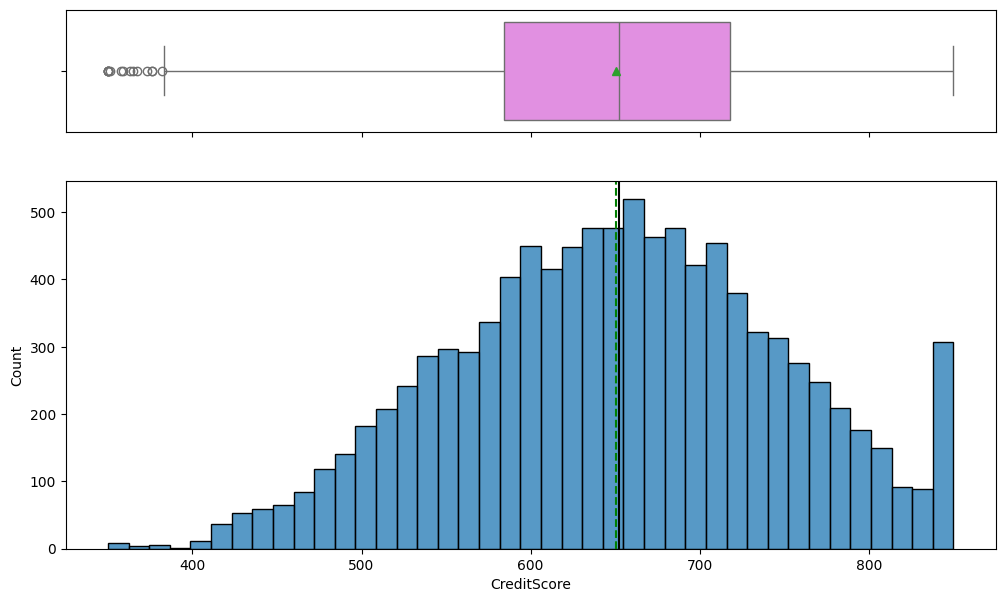

In [21]:
Title = 'CreditScore'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

histogram_boxplot(churn_visual, Title)

### Observations
* `CreditScore` distribution is left skewed.
* The plot shows outliers below 400.
* The Median is about 660 and the mean is very close to the median
* There are a large number of customers with `CreditScore` above 840.
* These values appear valid due to wide variations in credit scores and thus will not be adjusted.

#### Observations on Age

Fig 2 - Age


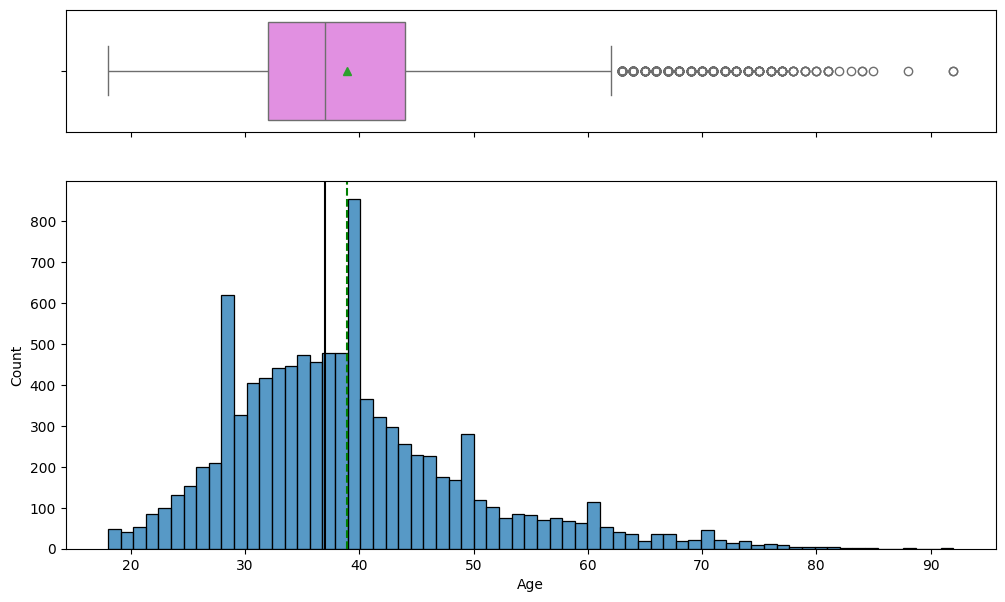

In [22]:
Title = 'Age'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

histogram_boxplot(churn_visual, Title)

### Observations
* The distribution of `Age` is skewed to the right.
* The plot shows outliers at the right side (high end of age) above 60.
* The median is about 37 and the mean is about 39.
* We will not adjust these outliers as they represent real ages and trends in age.

#### Observations on Balance

Fig 3 - Balance


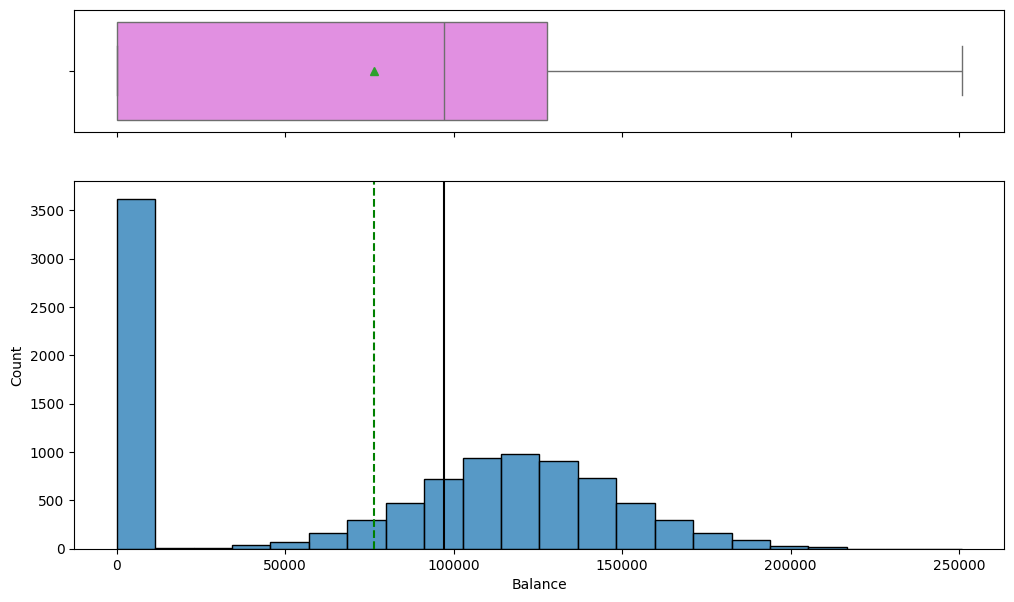

In [23]:
Title = 'Balance'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

histogram_boxplot(churn_visual, Title) 

### Observations
* The distribution of `Balance` is would be normal if not for the huge number of customers with 0 `Balance` (3617).
* This may indicate customers with a credit card only and not a bank account.
* No outliers.

#### Observations on Estimated Salary

Fig 4 - EstimatedSalary


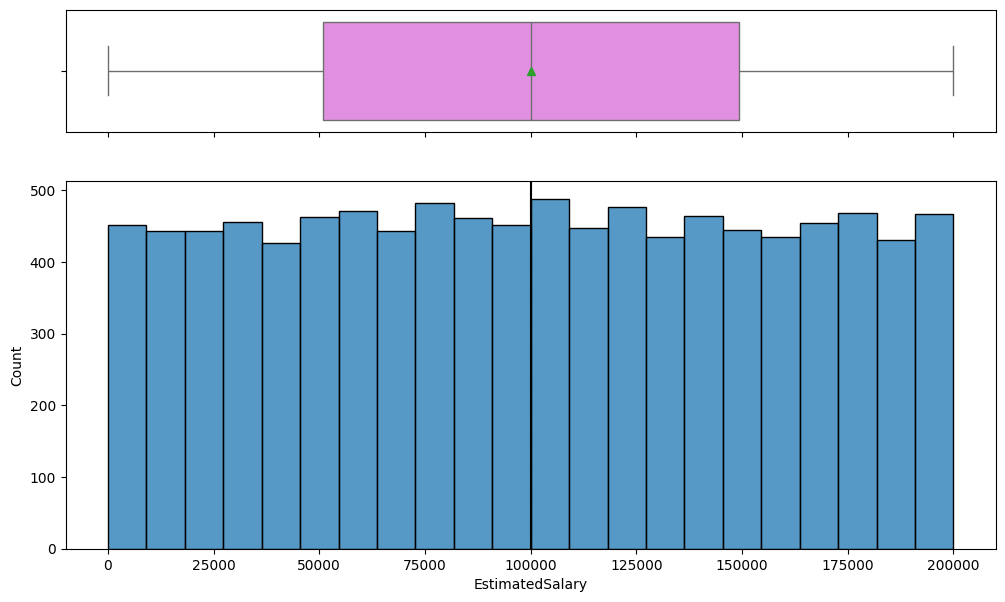

In [24]:
Title = 'EstimatedSalary'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

histogram_boxplot(churn_visual, Title)

### Observations
* The distribution of `EstimatedSalary` is close to even across the range.
* The plot shows no outliers.
* This variable will likely have little influence.

#### Observations on Exited

Fig 5 - Exited


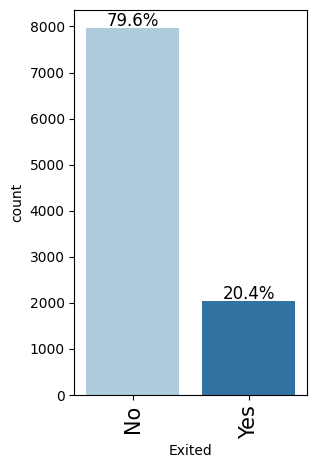

In [25]:
Title = 'Exited'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

labeled_barplot(churn_visual, Title, perc=True)

### Observations
* Almost 80% of customers churned.
* The data set is imbalanced.

#### Observations on Geography

Fig 6 - Geography


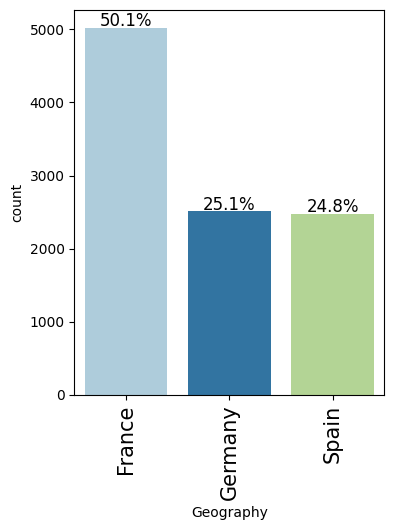

In [26]:
Title = 'Geography'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

labeled_barplot(churn_visual, Title, perc=True) 

### Observations
* 50% of customers are in France. 
* 25% are in Germany and 25% are in Spain.

#### Observations on Gender

Fig 7 - Gender


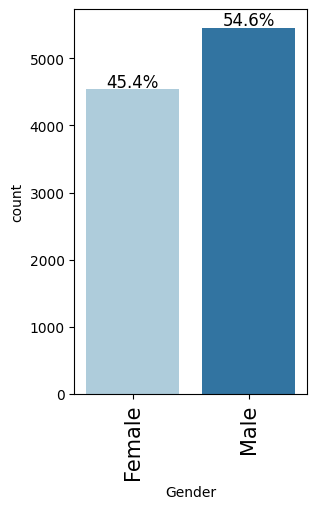

In [27]:
Title = 'Gender'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

labeled_barplot(churn_visual, Title, perc=True)

### Observations
* Almost 55% of customers are male.

#### Observations on Tenure

Fig 8 - Tenure


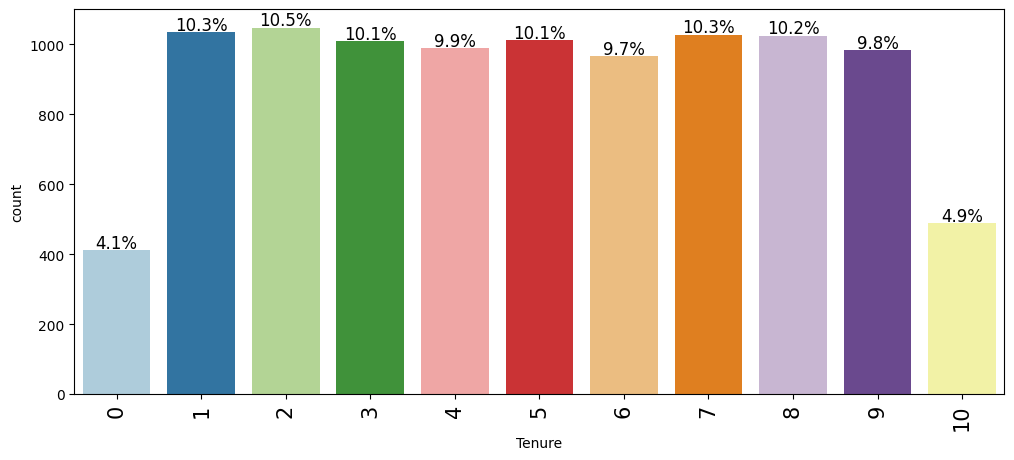

In [28]:
Title = 'Tenure'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

labeled_barplot(churn_visual, Title, perc=True)

### Observations
* The distribution of `Tenure` is fairly even between 1-9 years.
* Similarly, customers at the low end (0) and high end (10) are about the same distribution.
* This data is strange in that it appears there hasn't been much growth this year in customers, and no one over 10 years.

#### Observations on Number of Products

Fig 9 - NumOfProducts


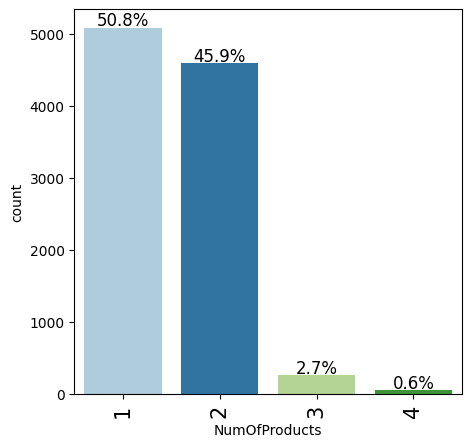

In [29]:
Title = 'NumOfProducts'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

labeled_barplot(churn_visual, Title, perc=True)

### Observations
* Around 51% of all customers have only 1 product, while ~46% have 2.
* Those with more than 2 are a very small minority.

#### Observations on Has Credit Card

Fig 10 - HasCrCard


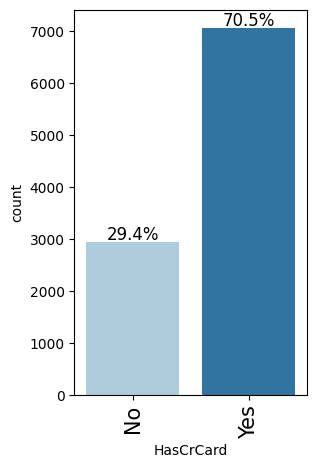

In [30]:
Title = 'HasCrCard'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

labeled_barplot(churn_visual, Title, perc=True)

### Observations
* 70.5% of customers have a credit card.

#### Observations on Is Active Member

Fig 11 - IsActiveMember


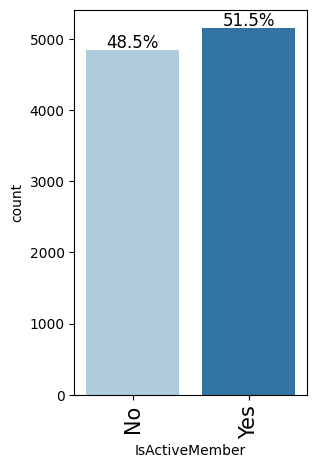

In [31]:
Title = 'IsActiveMember'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

labeled_barplot(churn_visual, Title, perc=True)

### Observations
* Almost 52% of customers are active.

### Bivariate Analysis

In [32]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()# function to plot stacked bar chart

Fig 12 - Pairplot


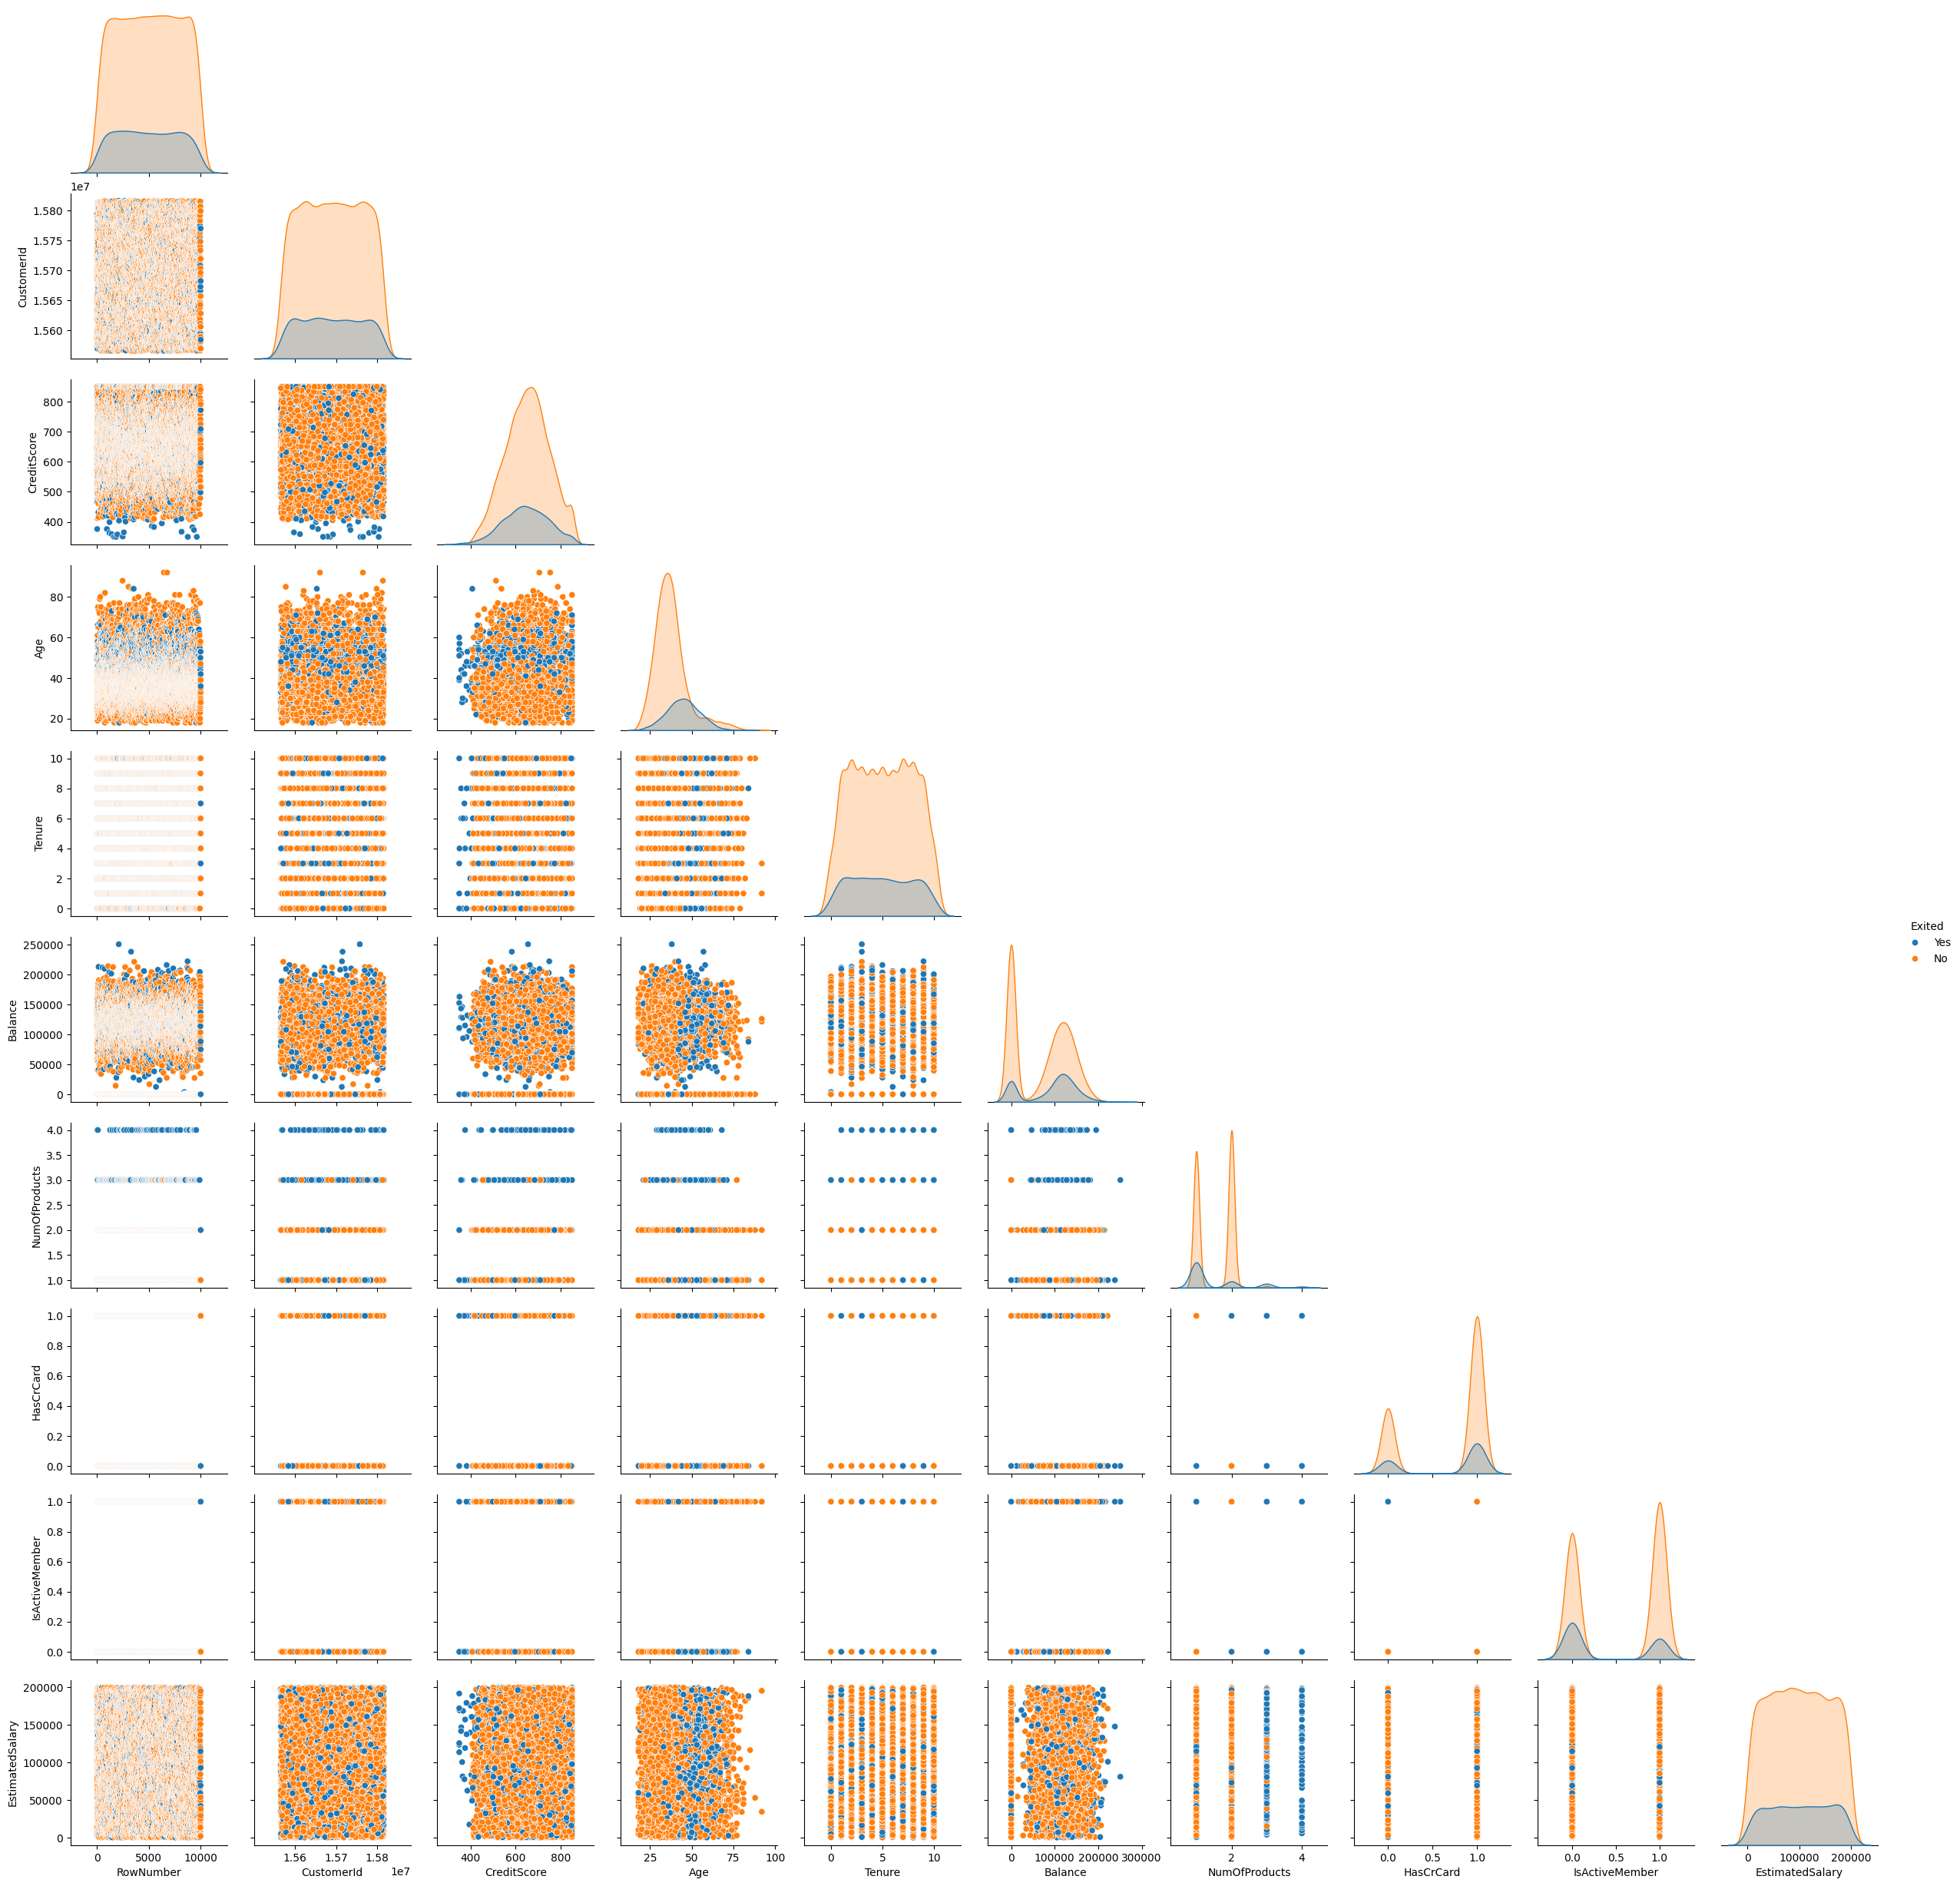

In [33]:
print("Fig "+str(figNo)+" - "+ "Pairplot")
figNo+=1


churn_pair = churn.copy()
churn_pair = churn_pair.replace({'Exited':{0:'No', 1:'Yes'}}) # do this so all data viz can benefit

sns.pairplot(churn_pair, diag_kind="kde",kind="scatter", hue="Exited", dropna=True, corner=True)
plt.show()

### Observations
* `CreditScore` for churn/no churn have a similar distribution.
* `Age` shows that middle-aged customers are more likely to churn than younger or older customers.
* `Tenure` shows similar churn/no churn distribution.
* `Balance` shows that smaller balances churn less than larger balances.
* `NumOfProducts` shows that less products churn more than more products.
* `HasCrCard` shows similar distributions for churn/no churn.
* `IsActiveMember` shows that Active members churn less than non active members.
* `EstimatedSalary` shows similar distributions for churn/no churn customers.

#### Correlation plot

Fig 13 - Correlation Plot


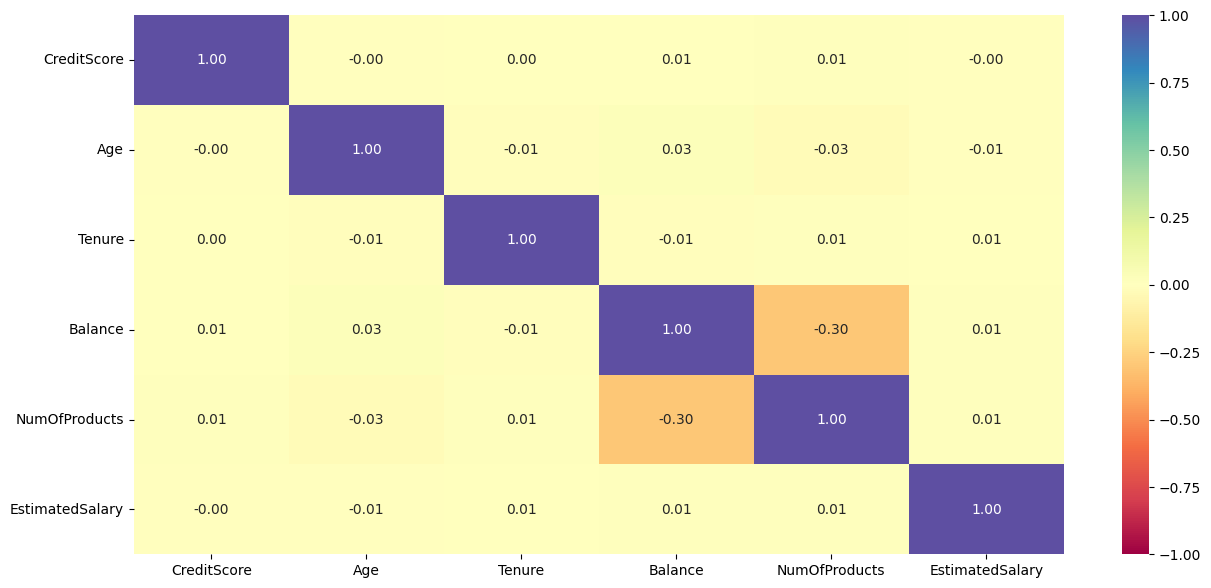

In [34]:
Title = 'Correlation Plot'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

plt.figure(figsize=(15, 7))
sns.heatmap(churn_visual.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations

* None of these items are strongly correlated.
* Balance and NumOfProducts is slighly negatively correlated.
* Not much insight to be gained here.

In [35]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Exited Vs Geography

Fig 14 - Exited Vs Geography
Exited       No   Yes    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


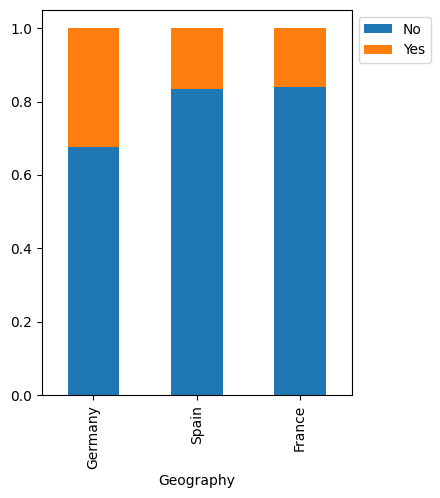

In [36]:
Title = 'Exited Vs Geography'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

stacked_barplot(churn_visual, "Geography", "Exited" )

### Observations
* Spanish customers churn similarly in proportion to French customers
* German customers churn at a higher ration, but also in overall number.

#### Exited Vs Gender

Fig 15 - Exited Vs Gender
Exited    No   Yes    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


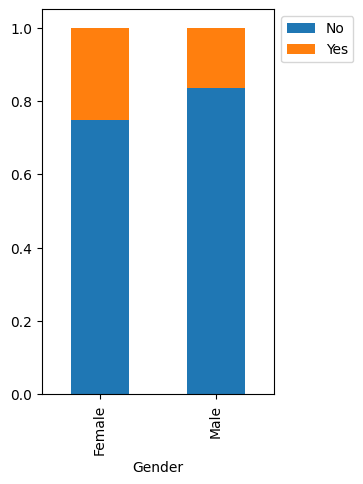

In [37]:
Title = 'Exited Vs Gender'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

stacked_barplot(churn_visual, "Gender", "Exited")

### Observations
* Females churn at a higher proportion than males and represent more of the overall churned customers.

#### Exited Vs Has Credit Card

Fig 16 - Exited Vs Has Credit Card
Exited       No   Yes    All
HasCrCard                   
All        7963  2037  10000
Yes        5631  1424   7055
No         2332   613   2945
------------------------------------------------------------------------------------------------------------------------


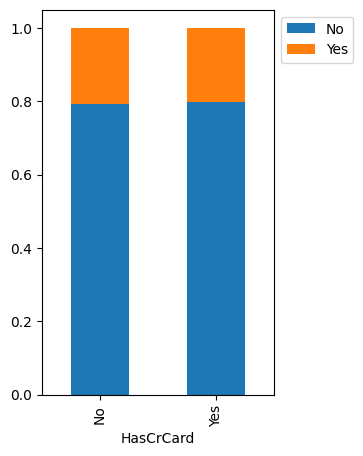

In [38]:
Title = 'Exited Vs Has Credit Card'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

stacked_barplot(churn_visual, "HasCrCard", "Exited")

### Observations
* Customers with or without credit cards churn at about the same proportion.
* Customers with a credit card make up the bulk of churners.

#### Exited Vs Is active member

Fig 17 - Exited Vs Is active member
Exited            No   Yes    All
IsActiveMember                   
All             7963  2037  10000
No              3547  1302   4849
Yes             4416   735   5151
------------------------------------------------------------------------------------------------------------------------


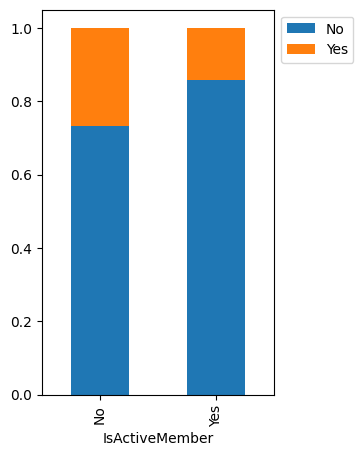

In [39]:
Title = 'Exited Vs Is active member'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

stacked_barplot(churn_visual, "IsActiveMember", "Exited")

### Observations
* Active customers churn less proportionally.
* Non-active customers make up the bulk of churners.

#### Exited Vs Credit Score

Fig 18 - Exited Vs Credit Score


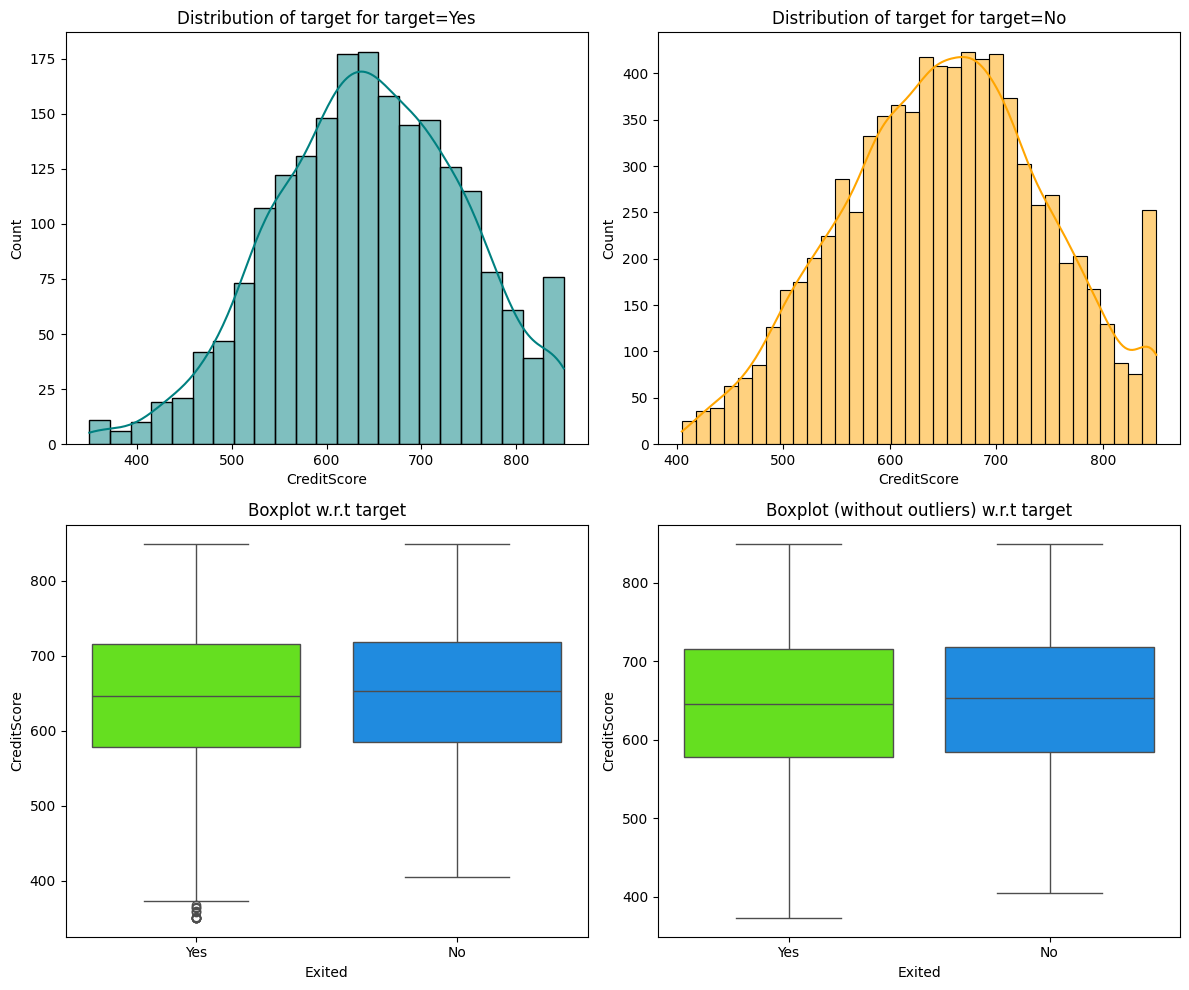

In [40]:
Title = 'Exited Vs Credit Score'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

distribution_plot_wrt_target(churn_visual, "CreditScore", "Exited")

### Observations
* The distribution of `CreditScore` is is similar for both groups of customers.
* There are several outliers with `CreditScore` below 400 that have churned.
* We will not adjust these outliers as they represent real trends.

#### Exited Vs Age

Fig 19 - Exited Vs Age


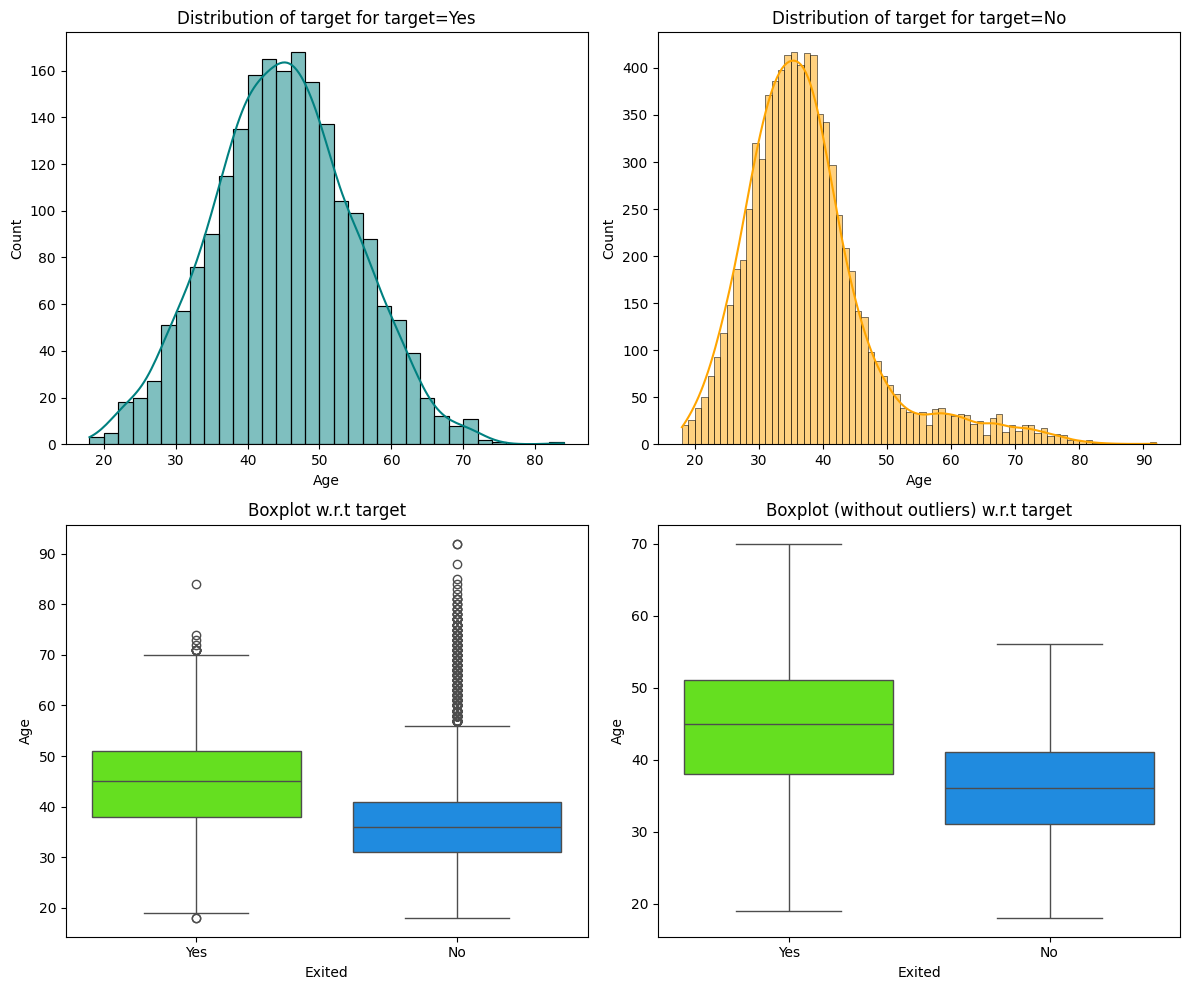

In [41]:
Title = 'Exited Vs Age'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

distribution_plot_wrt_target(churn_visual, "Age", "Exited")

### Observations
* The plot shows many outliers at the higher end of age
* Customers between 40-50 show a tendency to churn.
* Customers between 30-40 and above 60 show low tendency to churn.
* We will not adjust these outliers as they represent real ages and trends in age.

#### Exited Vs Tenure

Fig 20 - Exited Vs Tenure


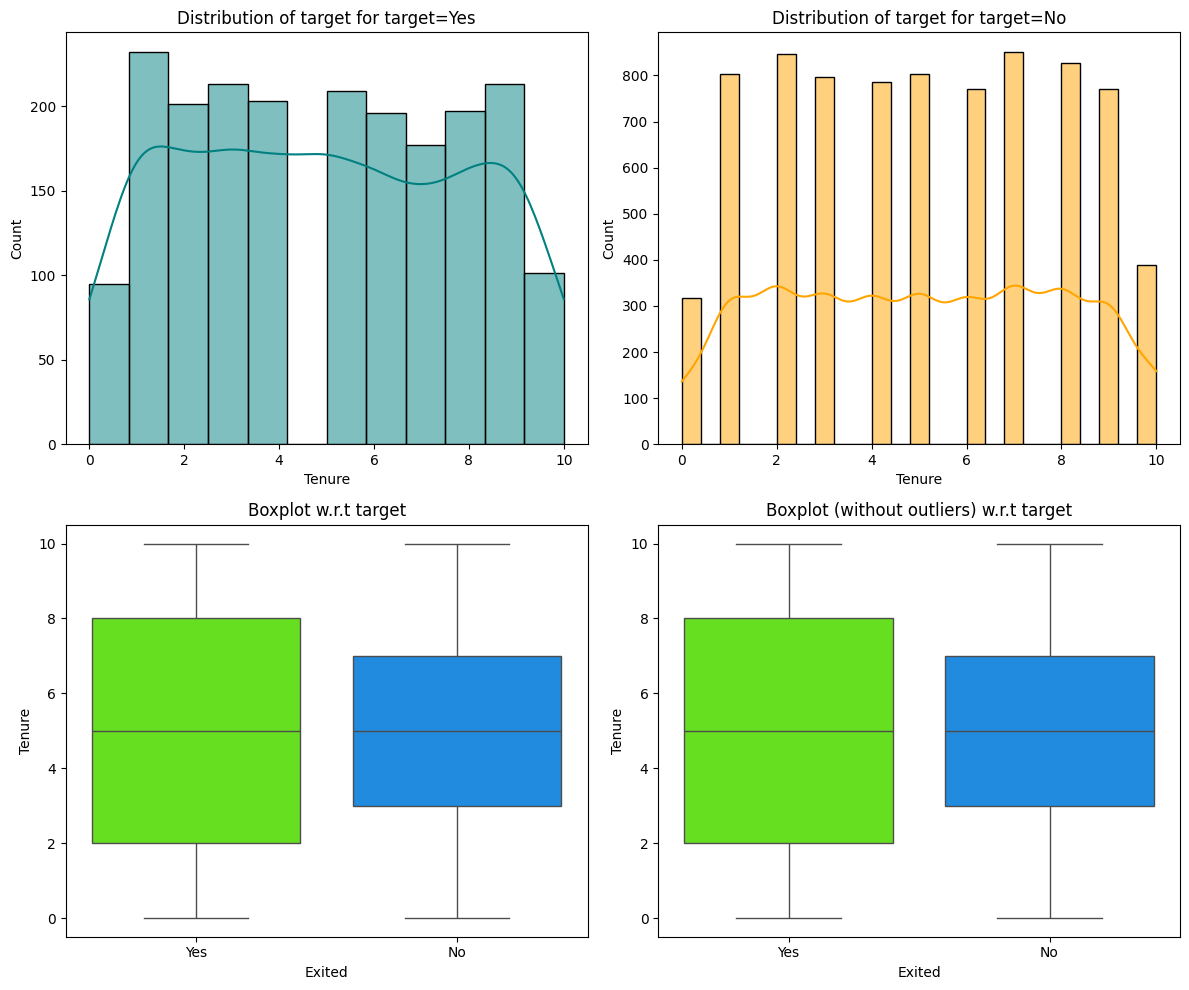

In [42]:
Title = 'Exited Vs Tenure'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

distribution_plot_wrt_target(churn_visual, "Tenure", "Exited")

### Observations
* No outliers.
* Distribution is similar in years 1-9, and very low in 0+10

#### Exited Vs Balance

Fig 21 - Exited Vs Balance


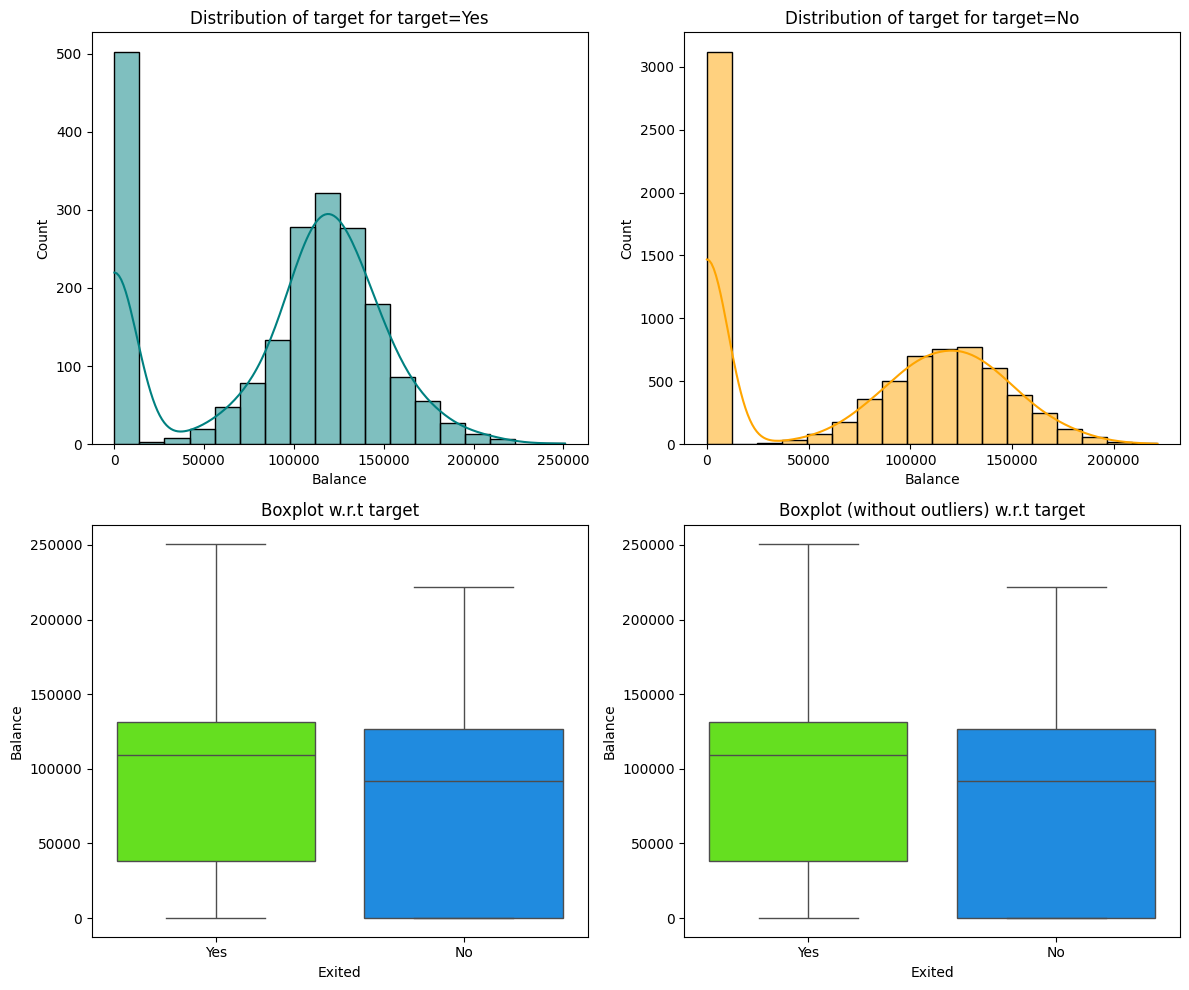

In [43]:
Title = 'Exited Vs Balance'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

distribution_plot_wrt_target(churn_visual, "Balance", "Exited")

### Observations
* Customers with a lower `Balance` tend to churn more.

#### Exited Vs Number of Products

Fig 22 - Exited Vs Number of Products


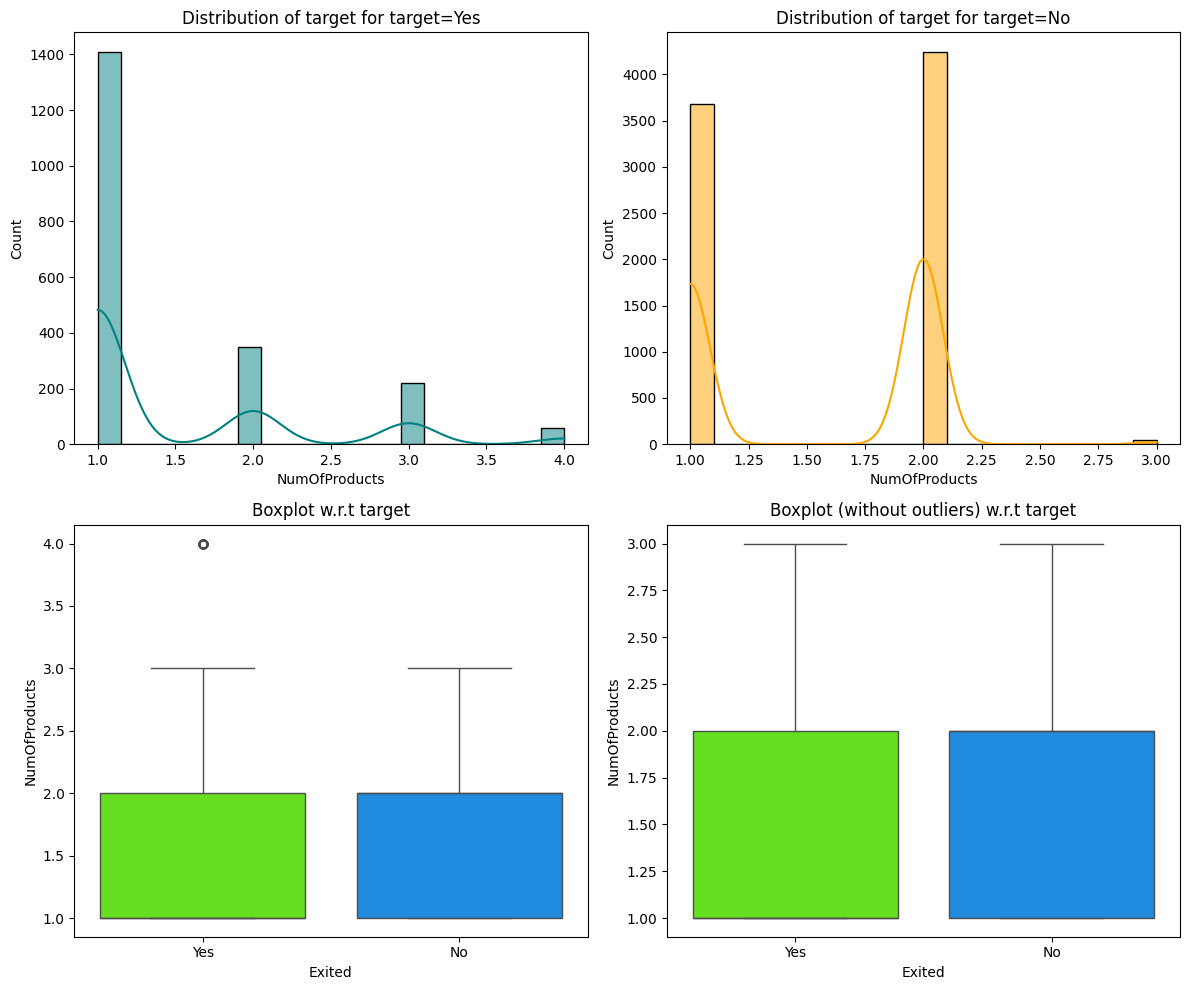

In [44]:
Title = 'Exited Vs Number of Products'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

distribution_plot_wrt_target(churn_visual, "NumOfProducts", "Exited")

### Observations
* Customers with 1 product churn the most. Since they only have 1 product, they probably have little incentive not to churn.
* Customers with 2 products churn the least.

#### Exited Vs Estimated Salary

Fig 23 - Exited Vs Estimated Salary


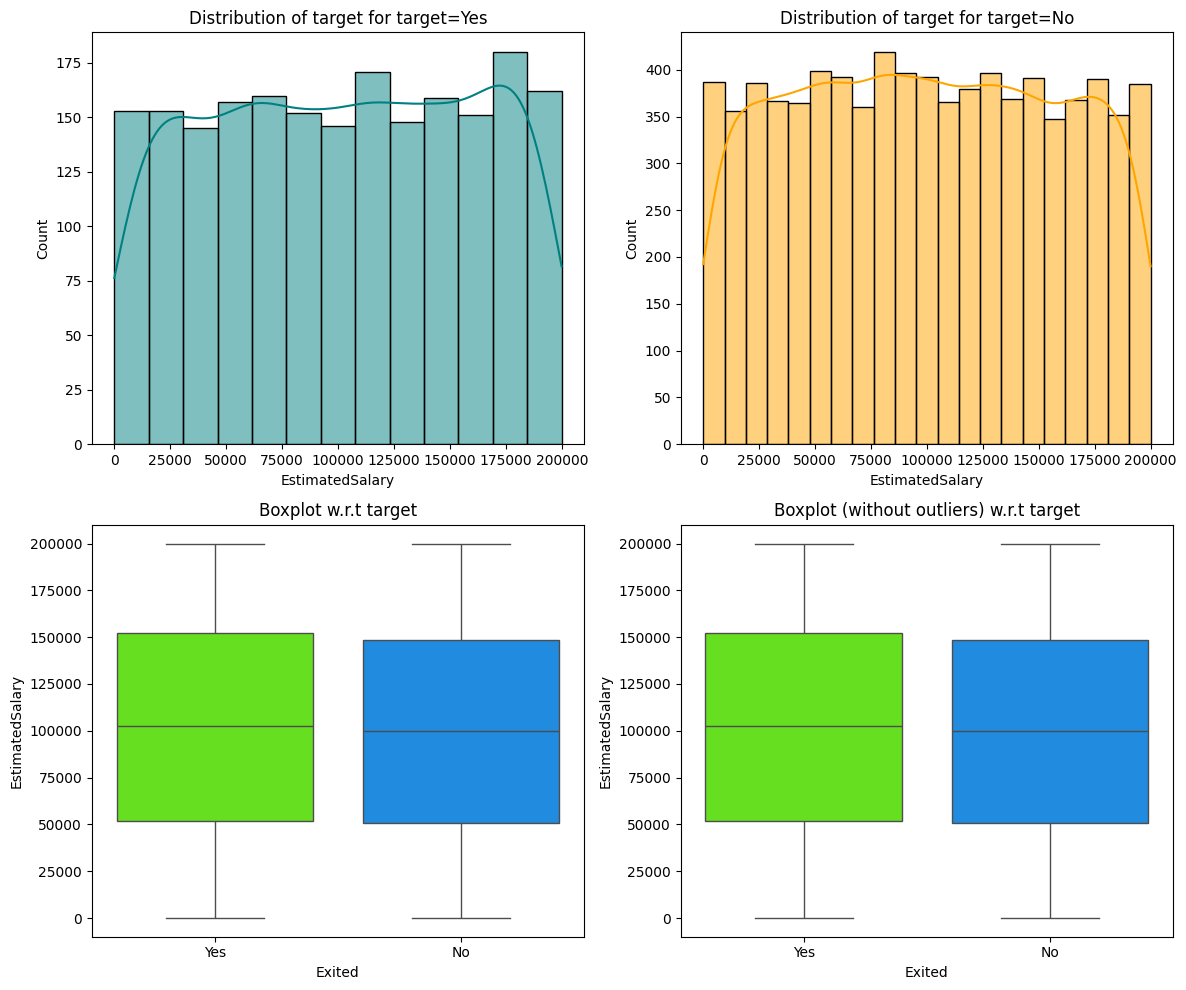

In [45]:
Title = 'Exited Vs Estimated Salary'
print("Fig "+ str(figNo)+" - "+ Title)
figNo+=1

distribution_plot_wrt_target(churn_visual, "EstimatedSalary", "Exited")

### Observations
* The distribution of `EstimatedSalary` is similar across both groups.
* This variable will likely not influence much in the model.

## Data Preprocessing

In [46]:
#Copy churn_data
churn_data = churn_drop.copy()

### Dummy Variable Creation

In [47]:
# Creating dummy variables for categorical variables
# churn_data = pd.get_dummies(data=churn_data, drop_first=True)

dummies = pd.get_dummies(churn_data[['Geography', 'Gender']], drop_first=True)
churn_data = pd.concat([churn_data.drop(['Geography', 'Gender'],axis=1), dummies],axis=1)

In [48]:
churn_data.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        False

In [49]:
churn_data.shape

(10000, 12)

### Data Normalization

In [50]:
churn_data_scaled=churn_data.copy()

In [51]:
churn_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


In [52]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Balance","EstimatedSalary","NumOfProducts","Tenure"]

# creating an instance of the RobustScaler since it will work better with outliers than standard
scaler = RobustScaler()

#X_train[cols_list] = sc.fit_transform(X_train[cols_list])
churn_data_scaled[cols_list] = scaler.fit_transform(churn_data_scaled[cols_list])

In [53]:
#Printing the maximum value and the minimum value of the independent variable.
print(churn_data_scaled.max())
print(churn_data_scaled.min())

CreditScore          1.477612
Age                  4.583333
Tenure                   1.25
Balance              1.204124
NumOfProducts             3.0
HasCrCard                   1
IsActiveMember              1
EstimatedSalary      1.014356
Exited                      1
Geography_Germany        True
Geography_Spain          True
Gender_Male              True
dtype: object
CreditScore         -2.253731
Age                 -1.583333
Tenure                  -1.25
Balance              -0.76148
NumOfProducts             0.0
HasCrCard                   0
IsActiveMember              0
EstimatedSalary     -1.018257
Exited                      0
Geography_Germany       False
Geography_Spain         False
Gender_Male             False
dtype: object


In [54]:
churn_data_scaled.shape

(10000, 12)

In [55]:
churn_data_scaled.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.246269  0.416667   -0.75 -0.761480            0.0          1   
1    -0.328358  0.333333   -1.00 -0.104906            0.0          0   
2    -1.119403  0.416667    0.75  0.489346            2.0          1   
3     0.350746  0.166667   -1.00 -0.761480            1.0          0   
4     1.477612  0.500000   -0.75  0.221806            0.0          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1         0.011739       1              False   
1               1         0.125512       0              False   
2               0         0.139630       1              False   
3               0        -0.064717       0              False   
4               1        -0.214561       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        False

### Train-validation-test Split

In [56]:
X = churn_data_scaled.drop(['Exited'],axis=1)
y = churn_data_scaled['Exited']

In [57]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [58]:
# Splitting the dataset into the Training and Validation set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.25, random_state = 42,stratify=y_large, shuffle = True)

In [59]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [60]:
print(y_train.shape, y_val.shape, y_test.shape)

(6000,) (2000,) (2000,)


In [61]:
X_train.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
1995    -0.507463  0.583333    0.00 -0.011961            1.0          1   
2724    -1.485075  0.083333    0.75  0.183515            0.0          1   
5224     1.126866  0.500000   -0.50 -0.761480            0.0          1   
7697    -0.380597  0.333333   -0.50 -0.761480            1.0          1   
1226    -0.902985  0.416667    0.25 -0.069523            1.0          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
1995               1         0.064755              False            False   
2724               0         0.299880               True            False   
5224               0        -0.286041              False             True   
7697               0        -0.466032              False             True   
1226               0        -0.253543               True            False   

      Gender_Male  
1995        False  
2724        False  
5224         True  
7697        False  
1226        False

In [62]:
X_val.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
6263    -1.544776  0.000000   -0.50 -0.761480            1.0          1   
7644     0.171642 -0.750000    1.00 -0.761480            0.0          1   
429     -0.626866  0.250000   -1.00  0.016327            0.0          0   
647     -0.552239  0.083333    0.50 -0.117038            0.0          1   
8353    -0.955224 -0.416667    0.25 -0.761480            0.0          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
6263               1         0.811278              False            False   
7644               0         0.344734              False            False   
429                0         0.349714               True            False   
647                0        -0.926929              False            False   
8353               1         0.332038              False             True   

      Gender_Male  
6263         True  
7644         True  
429          True  
647          True  
8353        False

In [63]:
X_test.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
5702    -0.500000 -0.083333    0.50 -0.761480            1.0          1   
3667    -0.947761 -0.333333   -0.25  0.264996            1.0          0   
1617    -0.708955  0.250000   -0.25 -0.761480            1.0          0   
5673    -0.097015 -0.250000    0.00  0.330564            1.0          0   
4272    -0.089552 -0.250000   -0.50 -0.151764            0.0          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
5702               0        -0.060078              False            False   
3667               0        -0.458611               True            False   
1617               1         0.053256              False             True   
5673               0        -0.673305              False             True   
4272               1         0.694721              False             True   

      Gender_Male  
5702         True  
3667         True  
1617        False  
5673         True  
4272        False

In [64]:
print(y_val.max())
print(y_val.min())

1
0


In [65]:
print(X_train.shape[0], "train samples")
print(X_val.shape[0], "validation samples")
print(X_test.shape[0], "test samples")

6000 train samples
2000 validation samples
2000 test samples


## Model Building

### Model Evaluation Criterion

Our model needs to predict customer churn.

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- True negatives (TN) are correctly predicted by the model.
- False negatives (FN) are real failures where it is not detected by the model.
- False positives (FP) are failures detected by the model when it should not have been.

- accuracy - how many of our predictions were true
- precision - of our postive predictions, how many were true?
- recall - out of all the ones that should be true, how many did we correctly predict
- f1 - how effective we make the tradeoff between precision and recall

Since a bank wants to detect customers who are at risk of leaving in the next 6 months, they would want to focus on recall to maximize detection of customers at risk and avoid false negatives. 

In [66]:
# defining the batch size and # epochs upfront
epochs = 50
batch_size = 64

**Let's create a function for plotting the confusion matrix**



In [67]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    
    group_names = ['True Positive','False Negative','False Positive','True Negative']
    categories = [ 'Not Exiting','Exiting']
    group_labels = ["{}\n".format(value) for value in group_names]
    group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    accuracy  = np.trace(cm) / float(np.sum(cm))
    precision = cm[1,1] / sum(cm[:,1])
    recall    = cm[1,1] / sum(cm[1,:])
    f1_score  = 2*precision*recall / (precision + recall)

    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=box_labels,fmt="",cmap='Blues',xticklabels=categories,yticklabels=categories)
    categories = [ 'Not Exiting','Exiting']
    plt.ylabel("True label")
    plt.xlabel('Predicted label' + stats_text)

In [68]:
def plot_train_vs_val_loss(loss, val_loss):
    """
    Plotting Train Loss vs Validation Loss

    loss: saved loss values from each epoch
    val_loss: saved validation loss values from each epoch
    """

    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [69]:
def plot_train_vs_val_recall(recall, val_recall):
    """
    Plotting Train recall vs Validation recall

    recall: saved recall values from each epoch
    val_recall: saved validation recall values from each epoch
    """

    plt.plot(recall)
    plt.plot(val_recall)
    plt.title('model recall')
    plt.ylabel('recall')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [70]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [71]:
#Save metrics for later comparison, since we are optimizing for recall, we'll save recall
training_metrics = pd.DataFrame(columns=["recall"])
validation_metrics = pd.DataFrame(columns=["recall"])

### Neural Network (64,32,16,8) with SGD Optimizer

In [72]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [73]:
model_name = "Neural Network (64,32,16,8) with SGD"

In [74]:
#Initializing the neural network
sgd_model = Sequential()
sgd_model.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
sgd_model.add(Dense(32, activation='relu'))
sgd_model.add(Dense(16, activation='relu'))
sgd_model.add(Dense(8, activation='relu'))
sgd_model.add(Dense(1, activation = 'sigmoid'))

In [75]:
# use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

### check if this is the correct metric

In [76]:
## compile the model with binary cross entropy as loss function and recall as the metric.
sgd_model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [77]:
sgd_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

### check batch size and epochs

In [78]:
# Fitting the ANN
sgd_history = sgd_model.fit(
    X_train, y_train,
    batch_size=batch_size, 
    epochs=epochs,
    validation_data=(X_val,y_val),
    verbose=1
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6280 - recall: 0.0536 - val_loss: 0.5475 - val_recall: 0.0000e+00
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5328 - recall: 0.0000e+00 - val_loss: 0.5128 - val_recall: 0.0000e+00
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5050 - recall: 0.0000e+00 - val_loss: 0.4996 - val_recall: 0.0000e+00
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4929 - recall: 0.0000e+00 - val_loss: 0.4897 - val_recall: 0.0000e+00
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4834 - recall: 0.0000e+00 - val_loss: 0.4802 - val_recall: 0.0000e+00
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4739 - recall: 0.0000e+00 - val_loss: 0.4701 - val_recall: 0.0000e+00
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4638 - recall: 0.0000e+00 - val_loss: 0.4603 - val_recall: 0.0000e+00
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4541 - recall: 0.0000e+00 - val_lo

**Loss function**

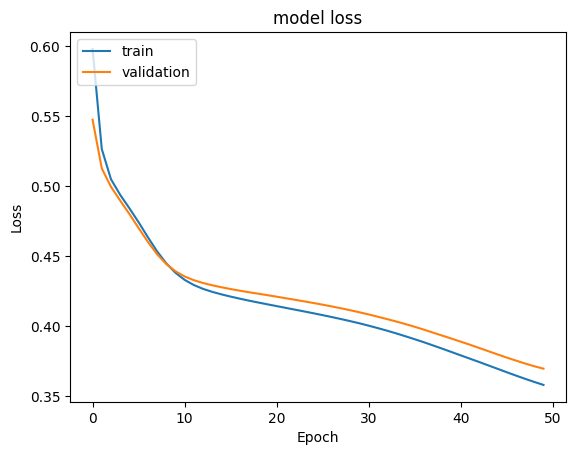

In [79]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(loss=sgd_history.history['loss'],val_loss=sgd_history.history['val_loss'])

* The loss in the validation and train sets is close and shows little noise

**Recall**

In [80]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(sgd_history.history['recall'],sgd_history.history['val_recall'])

In [81]:
#Predicting the results using best as a threshold
y_train_pred = sgd_model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [82]:
#Predicting the results using best as a threshold
y_val_pred = sgd_model.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [83]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train, y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val, y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.429272
Name: Neural Network (64,32,16,8) with SGD, dtype: float64
recall    0.398034
Name: Neural Network (64,32,16,8) with SGD, dtype: float64


**Classification report**

In [84]:
#classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      4777
           1       0.76      0.43      0.55      1223

    accuracy                           0.86      6000
   macro avg       0.81      0.70      0.73      6000
weighted avg       0.85      0.86      0.84      6000



In [85]:
#classification report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.75      0.40      0.52       407

    accuracy                           0.85      2000
   macro avg       0.80      0.68      0.72      2000
weighted avg       0.84      0.85      0.83      2000



**Confusion matrix**

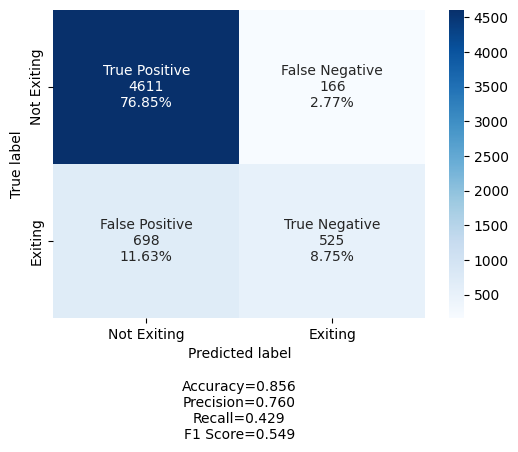

In [86]:
make_confusion_matrix(y_train, y_train_pred)

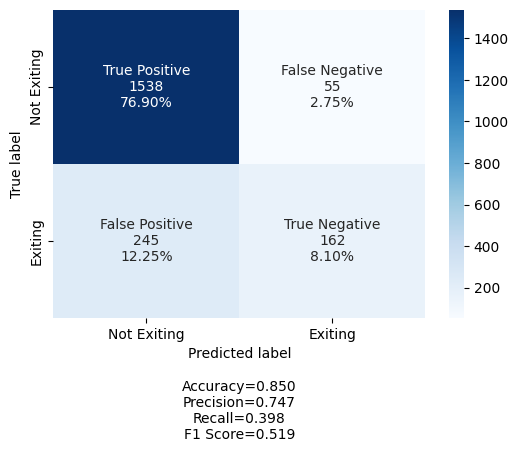

In [87]:
make_confusion_matrix(y_val, y_val_pred)

### Observations
* Recall for this model is very low, with training and validation both in the mid to upper 40's
* Let's add momentum and see if it helps.

### Neural Network (64,32,16,8) with SGD + Momentum (0.9)

In [88]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [89]:
model_name = "Neural Network (64,32,16,8) with SGD + Momentum (0.9)"

In [90]:
#Initializing the neural network
sgd_momentum_model = Sequential()
sgd_momentum_model.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
sgd_momentum_model.add(Dense(32, activation='relu'))
sgd_momentum_model.add(Dense(16, activation='relu'))
sgd_momentum_model.add(Dense(8, activation='relu'))
sgd_momentum_model.add(Dense(1, activation = 'sigmoid'))

In [91]:
# use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

### check if this is the correct metric

In [92]:
## compile the model with binary cross entropy as loss function and recall as the metric.
sgd_momentum_model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [93]:
sgd_momentum_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

### check batch size and epochs

In [94]:
# Fitting the ANN
sgd_momentum_history = sgd_momentum_model.fit(
    X_train, y_train,
    batch_size=batch_size, 
    epochs=epochs,
    validation_data=(X_val,y_val),
    verbose=1
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5618 - recall: 0.0316 - val_loss: 0.4647 - val_recall: 0.0000e+00
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4473 - recall: 0.0000e+00 - val_loss: 0.4293 - val_recall: 0.0025
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4224 - recall: 0.0103 - val_loss: 0.4212 - val_recall: 0.1744
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4119 - recall: 0.1734 - val_loss: 0.4120 - val_recall: 0.2604
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4007 - recall: 0.2639 - val_loss: 0.3974 - val_recall: 0.3440
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3850 - recall: 0.3386 - val_loss: 0.3800 - val_recall: 0.4472
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3660 - recall: 0.4105 - val_loss: 0.3640 - val_recall: 0.4373
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3530 - recall: 0.4427 - val_loss: 0.3569 - val_recall: 0.4349
Epoch 9/50
94/94

**Loss function**

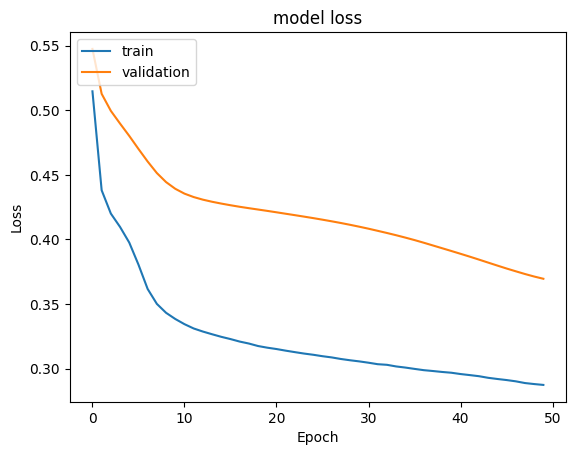

In [95]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(loss=sgd_momentum_history.history['loss'],val_loss=sgd_history.history['val_loss'])

* The loss in the validation and train sets is not close but shows little noise

**Recall**

In [96]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(sgd_momentum_history.history['recall'],sgd_history.history['val_recall'])

In [97]:
#Predicting the results using best as a threshold
y_train_pred = sgd_momentum_model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [98]:
#Predicting the results using best as a threshold
y_val_pred = sgd_momentum_model.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [99]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train, y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val, y_val_pred)


print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.518397
Name: Neural Network (64,32,16,8) with SGD + Momentum (0.9), dtype: float64
recall    0.405405
Name: Neural Network (64,32,16,8) with SGD + Momentum (0.9), dtype: float64


**Classification report**

In [100]:
#classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4777
           1       0.86      0.52      0.65      1223

    accuracy                           0.89      6000
   macro avg       0.88      0.75      0.79      6000
weighted avg       0.88      0.89      0.87      6000



In [101]:
#classification report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.77      0.41      0.53       407

    accuracy                           0.85      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.85      0.84      2000



**Confusion matrix**

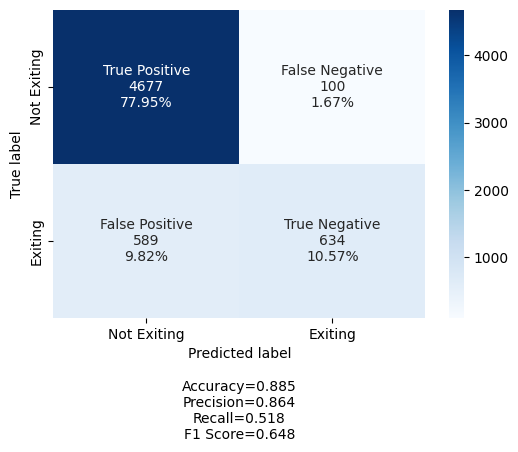

In [102]:
make_confusion_matrix(y_train, y_train_pred)

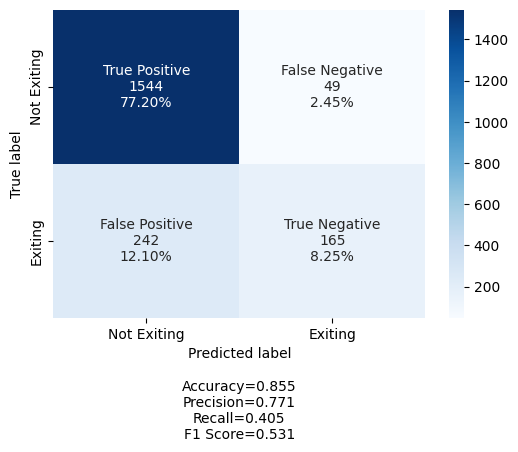

In [103]:
make_confusion_matrix(y_val, y_val_pred)

### Observations
* Momentum improved recall performance on the traing set, but no improvemnt in validation.
* Let's try Adam this time.

## Model Performance Improvement

### Neural Network (64,32,16,8) with Adam Optimizer

In [104]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [105]:
model_name = "Neural Network (64,32,16,8) with Adam"

In [106]:
#Initializing the neural network
adam_model = Sequential()
adam_model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
adam_model.add(Dense(32,activation='relu'))
adam_model.add(Dense(16,activation='relu'))
adam_model.add(Dense(8,activation='relu'))
adam_model.add(Dense(1, activation = 'sigmoid'))

In [107]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [108]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [109]:
adam_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

**Loss function**

In [110]:
#Fitting the ANN
adam_history = adam_model.fit(
    X_train,y_train,
    batch_size=batch_size, 
    epochs=epochs,
    validation_data=(X_val,y_val),
    verbose=1
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5593 - recall: 0.0227 - val_loss: 0.4319 - val_recall: 0.0074
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4249 - recall: 0.0466 - val_loss: 0.4178 - val_recall: 0.1695
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4067 - recall: 0.1933 - val_loss: 0.3960 - val_recall: 0.3243
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3789 - recall: 0.3813 - val_loss: 0.3712 - val_recall: 0.4152
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3547 - recall: 0.4507 - val_loss: 0.3596 - val_recall: 0.4423
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3428 - recall: 0.4688 - val_loss: 0.3554 - val_recall: 0.4570
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3355 - recall: 0.4841 - val_loss: 0.3535 - val_recall: 0.4595
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3304 - recall: 0.4894 - val_loss: 0.3531 - val_recall: 0.4472
Epoch 9/50
94/94 ━━━━━━━

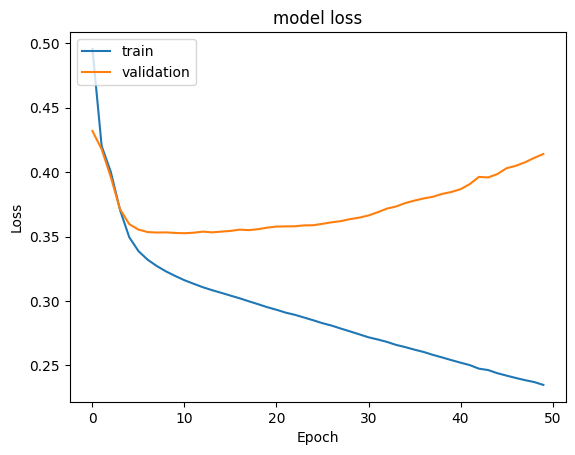

In [111]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_history.history['loss'],adam_history.history['val_loss'])

* The loss in the validation and train sets is not close  past epoch 5 and shows little noise

**Recall**

In [112]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_history.history['recall'],adam_history.history['val_recall'])

In [113]:
#Predicting the results using 0.5 as the threshold
y_train_pred = adam_model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [114]:
#Predicting the results using 0.5 as the threshold
y_val_pred = adam_model.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [115]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.651676
Name: Neural Network (64,32,16,8) with Adam, dtype: float64
recall    0.479115
Name: Neural Network (64,32,16,8) with Adam, dtype: float64


**Classification report**

In [116]:
#lassification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4777
           1       0.85      0.65      0.74      1223

    accuracy                           0.91      6000
   macro avg       0.88      0.81      0.84      6000
weighted avg       0.90      0.91      0.90      6000



In [117]:
#classification report
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.67      0.48      0.56       407

    accuracy                           0.85      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.83      0.85      0.84      2000



**Confusion matrix**

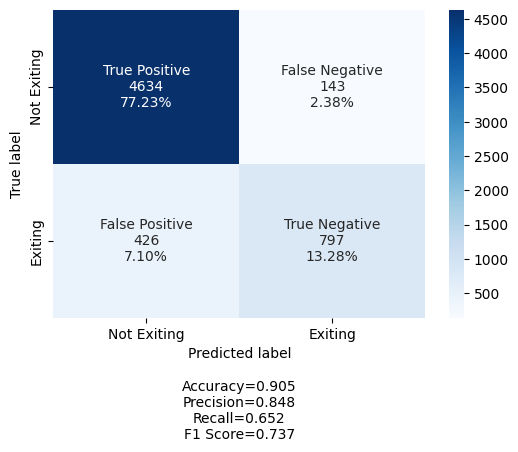

In [118]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

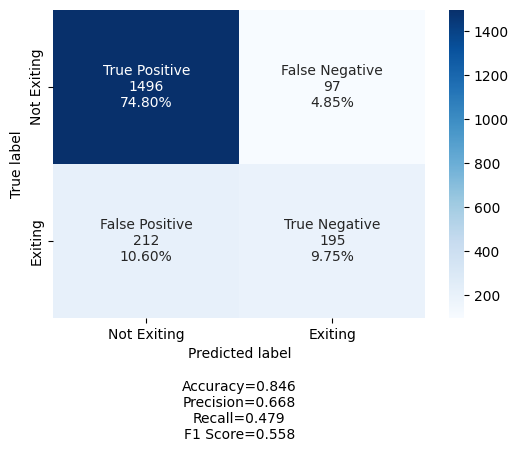

In [119]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Training recall improved, but validation got worse.
* Let's try increasing complexity with more layers to see what happens.

### Neural Network (256,128,64,32,16,8) with Adam Optimizer

In [120]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [121]:
model_name = "Neural Network (256,128,64,32,16,8) with Adam"

In [122]:
#Initializing the neural network
adam_model2 = Sequential()
adam_model2.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
adam_model2.add(Dense(128,activation='relu'))
adam_model2.add(Dense(64,activation='relu'))
adam_model2.add(Dense(32,activation='relu'))
adam_model2.add(Dense(16,activation='relu'))
adam_model2.add(Dense(8,activation='relu'))
adam_model2.add(Dense(1, activation = 'sigmoid'))

In [123]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [124]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [125]:
adam_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,977 (183.50 KB)

 Trainable params: 46,977 (183.50 KB)

 Non-trainable params: 0 (0.00 B)

**Loss function**

In [126]:
#Fitting the ANN
adam_history2 = adam_model2.fit(
    X_train,y_train,
    batch_size=batch_size, 
    epochs=epochs,
    validation_data=(X_val,y_val),
    verbose=1
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5675 - recall: 0.1212 - val_loss: 0.4238 - val_recall: 0.2260
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4069 - recall: 0.2640 - val_loss: 0.3940 - val_recall: 0.3857
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3706 - recall: 0.3913 - val_loss: 0.3704 - val_recall: 0.3661
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3492 - recall: 0.4323 - val_loss: 0.3654 - val_recall: 0.3292
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3398 - recall: 0.4311 - val_loss: 0.3629 - val_recall: 0.3292
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3334 - recall: 0.4415 - val_loss: 0.3604 - val_recall: 0.3243
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3285 - recall: 0.4303 - val_loss: 0.3608 - val_recall: 0.3096
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3245 - recall: 0.4324 - val_loss: 0.3626 - val_recall: 0.2899
Epoch 9/50
94/94 ━━━━━━━

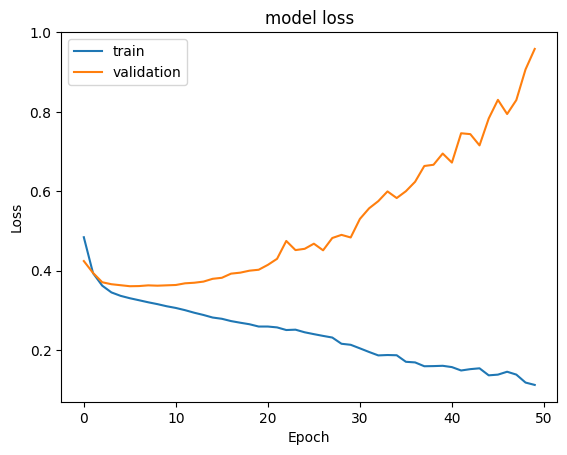

In [127]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_history2.history['loss'],adam_history2.history['val_loss'])

* The loss in the validation and train sets diverges drastically and begins showing noise after epoch 20

In [128]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_history2.history['recall'],adam_history2.history['val_recall'])

In [129]:
#Predicting the results using 0.5 as the threshold
y_train_pred = adam_model2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [130]:
#Predicting the results using 0.5 as the threshold
y_val_pred = adam_model2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [131]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.806214
Name: Neural Network (256,128,64,32,16,8) with Adam, dtype: float64
recall    0.4914
Name: Neural Network (256,128,64,32,16,8) with Adam, dtype: float64


**Classification report**

In [132]:
#lassification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4777
           1       0.91      0.81      0.86      1223

    accuracy                           0.94      6000
   macro avg       0.93      0.89      0.91      6000
weighted avg       0.94      0.94      0.94      6000



In [133]:
#classification report
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1593
           1       0.61      0.49      0.54       407

    accuracy                           0.83      2000
   macro avg       0.74      0.71      0.72      2000
weighted avg       0.82      0.83      0.83      2000



**Confusion matrix**

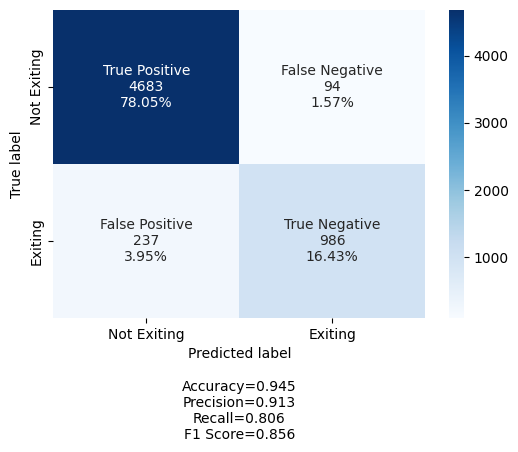

In [134]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

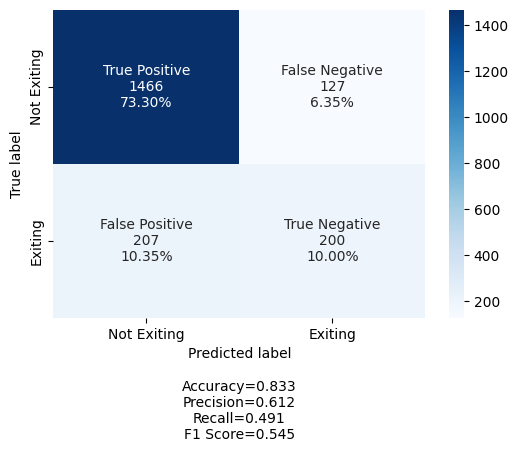

In [135]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Training Recall improved quite a bit, but validation not so much. 
* Training is probably overfitting the data.
* Let's see if adding a learning rate improves anything.  We'll go with .001 to start

### Neural Network (256,128,64,128,64,8) with Adam + LR (0.001)

In [136]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [137]:
model_name = "Neural Network (256,128,64,128,64,8) with Adam + LR (0.001)"

In [138]:
#Initializing the neural network
adam_model3 = Sequential()
adam_model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
adam_model3.add(Dense(128,activation='relu'))
adam_model3.add(Dense(64,activation='relu'))
adam_model3.add(Dense(128,activation='relu'))
adam_model3.add(Dense(64,activation='relu'))
adam_model3.add(Dense(8,activation='relu'))
adam_model3.add(Dense(1, activation = 'sigmoid'))

In [139]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [140]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [141]:
adam_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,565 (41.27 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,044 (27.52 KB)

**Loss function**

In [142]:
#Fitting the ANN
adam_history3 = adam_model3.fit(
    X_train,y_train,
    batch_size=batch_size, 
    epochs=epochs,
    validation_data=(X_val,y_val),
    verbose=1
)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5314 - recall: 0.0664 - val_loss: 0.4201 - val_recall: 0.1892
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3925 - recall: 0.3479 - val_loss: 0.3848 - val_recall: 0.3464
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3557 - recall: 0.4013 - val_loss: 0.3611 - val_recall: 0.3882
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3372 - recall: 0.4386 - val_loss: 0.3598 - val_recall: 0.3538
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3301 - recall: 0.4380 - val_loss: 0.3578 - val_recall: 0.3735
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3252 - recall: 0.4473 - val_loss: 0.3581 - val_recall: 0.3538
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3180 - recall: 0.4527 - val_loss: 0.3597 - val_recall: 0.3636
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3155 - recall: 0.4541 - val_loss: 0.3641 - val_recall: 0.3784
Epoch 9/50
94/94 ━━━━━━━

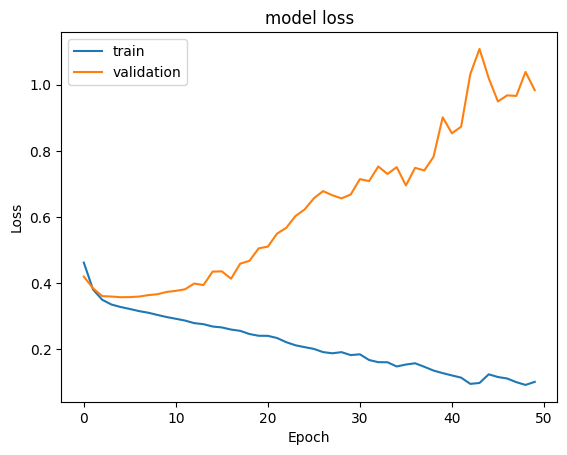

In [143]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_history3.history['loss'],adam_history3.history['val_loss'])

* The loss in the validation and train sets diverges drastically and begins showing noise after epoch 12

In [144]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_history3.history['recall'],adam_history3.history['val_recall'])

In [145]:
#Predicting the results using 0.5 as the threshold
y_train_pred = adam_model3.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [146]:
#Predicting the results using 0.5 as the threshold
y_val_pred = adam_model3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [147]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.876533
Name: Neural Network (256,128,64,128,64,8) with Adam + LR (0.001), dtype: float64
recall    0.457002
Name: Neural Network (256,128,64,128,64,8) with Adam + LR (0.001), dtype: float64


**Classification report**

In [148]:
#lassification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4777
           1       0.87      0.88      0.87      1223

    accuracy                           0.95      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.95      0.95      0.95      6000



In [149]:
#classification report
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1593
           1       0.52      0.46      0.49       407

    accuracy                           0.80      2000
   macro avg       0.69      0.67      0.68      2000
weighted avg       0.79      0.80      0.80      2000



**Confusion matrix**

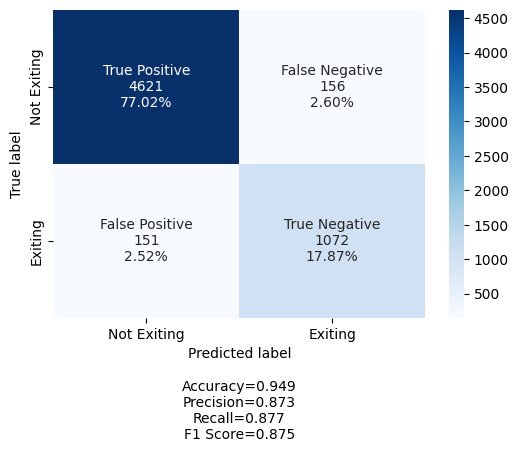

In [150]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

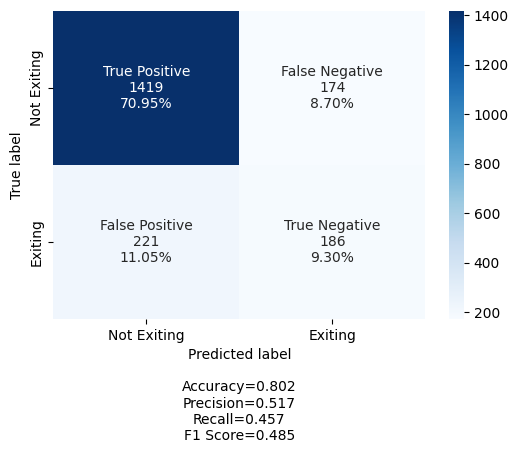

In [151]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* About the same resuts as previous model, with high recall on training data but low on validation.
* Lets resimplify the model and add Dropout.

### Neural Network (64,32,16,8) with Adam & Dropout (0.4, 0.3, 0.2, 0.1)

In [152]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [153]:
model_name = "Neural Network (64,32,16,8) with Adam & Dropout (0.4, 0.3, 0.2, 0.1)"

In [154]:
#Initializing the neural network
adam_dropout_model = Sequential()
adam_dropout_model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
adam_dropout_model.add(Dropout(0.4))
adam_dropout_model.add(Dense(32,activation='relu'))
adam_dropout_model.add(Dropout(0.3))
adam_dropout_model.add(Dense(16,activation='relu'))
adam_dropout_model.add(Dropout(0.2))
adam_dropout_model.add(Dense(8,activation='relu'))
adam_dropout_model.add(Dropout(0.1))
adam_dropout_model.add(Dense(1, activation = 'sigmoid'))

In [155]:
#Cuse Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [156]:
## compile the model with binary cross entropy as loss function and recall as the metric.
adam_dropout_model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [157]:
# Summary of the model
adam_dropout_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

**Loss function**

In [158]:
#Fitting the ANN 
adam_dropout_history = adam_dropout_model.fit(
    X_train,y_train,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6397 - recall: 0.1852 - val_loss: 0.4683 - val_recall: 0.0000e+00
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4878 - recall: 0.0000e+00 - val_loss: 0.4347 - val_recall: 0.0000e+00
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4600 - recall: 1.3815e-04 - val_loss: 0.4331 - val_recall: 0.0000e+00
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4593 - recall: 0.0059 - val_loss: 0.4305 - val_recall: 0.0000e+00
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4513 - recall: 0.0253 - val_loss: 0.4259 - val_recall: 0.1204
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4426 - recall: 0.1141 - val_loss: 0.4191 - val_recall: 0.2703
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4381 - recall: 0.1852 - val_loss: 0.4107 - val_recall: 0.3022
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4196 - recall: 0.2449 - val_loss: 0.4028 - val_recall: 0.3194


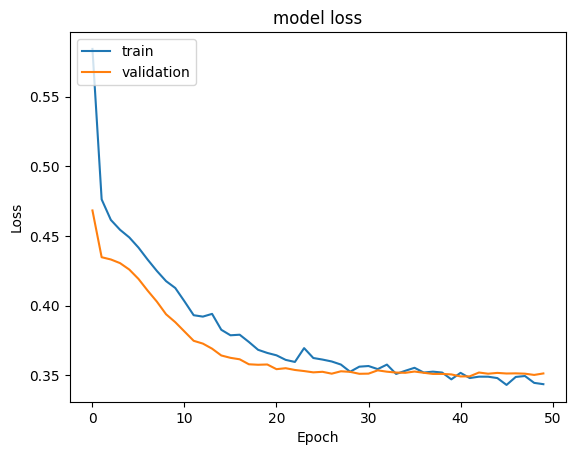

In [159]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_history.history['loss'],adam_dropout_history.history['val_loss'])

* The loss in the validation and train sets converges again around epoch 26, but traing set shows a bit of noise due to dropout

In [160]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_dropout_history.history['recall'],adam_dropout_history.history['val_recall'])

In [161]:
#Predicting the results using best as a threshold
y_train_pred = adam_dropout_model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [162]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = adam_dropout_model.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [163]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.510221
Name: Neural Network (64,32,16,8) with Adam & Dropout (0.4, 0.3, 0.2, 0.1), dtype: float64
recall    0.474201
Name: Neural Network (64,32,16,8) with Adam & Dropout (0.4, 0.3, 0.2, 0.1), dtype: float64


**Classification report**

In [164]:
#classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4777
           1       0.78      0.51      0.62      1223

    accuracy                           0.87      6000
   macro avg       0.83      0.74      0.77      6000
weighted avg       0.86      0.87      0.86      6000



In [165]:
#classification report
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1593
           1       0.73      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



**Confusion matrix**

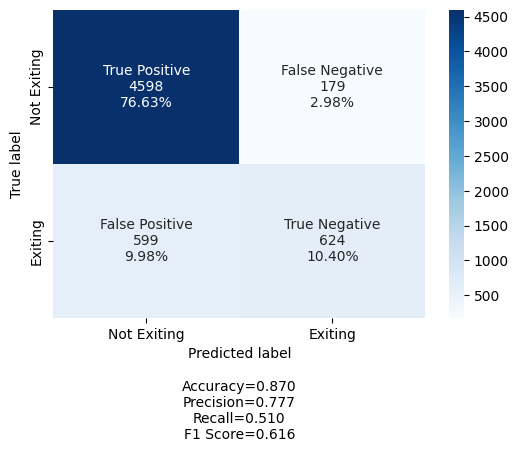

In [166]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

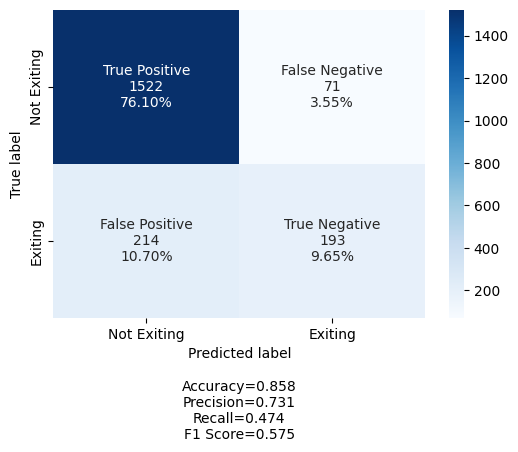

In [167]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Terrible recall performance, so lets simplify and see.
* Accuracy and Precision seem to have improved, but we're not optimizing for those.

### Neural Network (32,16,8) with Adam & Dropout (0.4, 0.3, 0.2)

In [168]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [169]:
model_name = "Neural Network (32,16,8) with Adam & Dropout (0.4, 0.3, 0.2)"

In [170]:
#Initializing the neural network
adam_dropout_model2 = Sequential()
adam_dropout_model2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
adam_dropout_model2.add(Dropout(0.4))
adam_dropout_model2.add(Dense(16,activation='relu'))
adam_dropout_model2.add(Dropout(0.3))
adam_dropout_model2.add(Dense(8,activation='relu'))
adam_dropout_model2.add(Dropout(0.2))
adam_dropout_model2.add(Dense(1, activation = 'sigmoid'))

In [171]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [172]:
## compile the model with binary cross entropy as loss function and recall as the metric.
adam_dropout_model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [173]:
# Summary of the model
adam_dropout_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

**Loss function**

In [174]:
#Fitting the ANN with batch_size = 32 and 100 epochs
adam_dropout_history2 = adam_dropout_model2.fit(
    X_train,y_train,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7092 - recall: 0.5137 - val_loss: 0.5181 - val_recall: 0.0000e+00
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5431 - recall: 0.0227 - val_loss: 0.4635 - val_recall: 0.0000e+00
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4995 - recall: 0.0240 - val_loss: 0.4447 - val_recall: 0.0074
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4850 - recall: 0.0316 - val_loss: 0.4354 - val_recall: 0.0197
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4705 - recall: 0.0701 - val_loss: 0.4313 - val_recall: 0.0221
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4627 - recall: 0.0546 - val_loss: 0.4282 - val_recall: 0.0344
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4590 - recall: 0.0693 - val_loss: 0.4256 - val_recall: 0.0516
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4503 - recall: 0.0872 - val_loss: 0.4226 - val_recall: 0.0565
Epoch 9/50
94/94

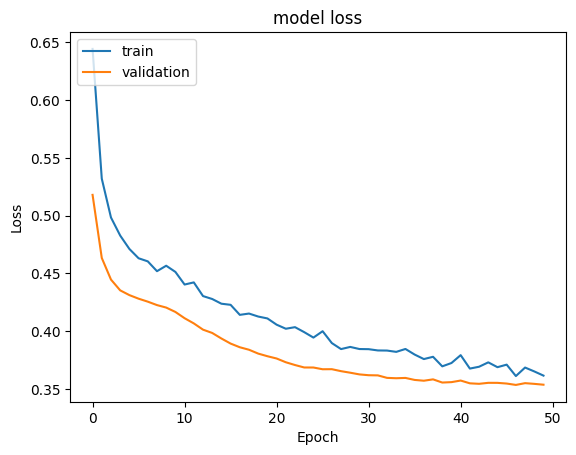

In [175]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_history2.history['loss'],adam_dropout_history2.history['val_loss'])

* The loss in the validation and train are similar, though divergent, and some noise in both sets though much more in triang due to dropout

In [176]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_dropout_history2.history['recall'],adam_dropout_history2.history['val_recall'])

In [177]:
#Predicting the results using best as a threshold
y_train_pred = adam_dropout_model2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [178]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = adam_dropout_model2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [179]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.420278
Name: Neural Network (32,16,8) with Adam & Dropout (0.4, 0.3, 0.2), dtype: float64
recall    0.383292
Name: Neural Network (32,16,8) with Adam & Dropout (0.4, 0.3, 0.2), dtype: float64


**Classification report**

In [180]:
#classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4777
           1       0.81      0.42      0.55      1223

    accuracy                           0.86      6000
   macro avg       0.84      0.70      0.74      6000
weighted avg       0.86      0.86      0.84      6000



In [181]:
#classification report
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.77      0.38      0.51       407

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



**Confusion matrix**

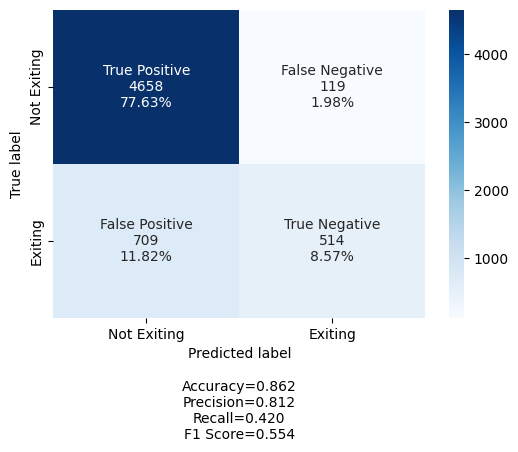

In [182]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

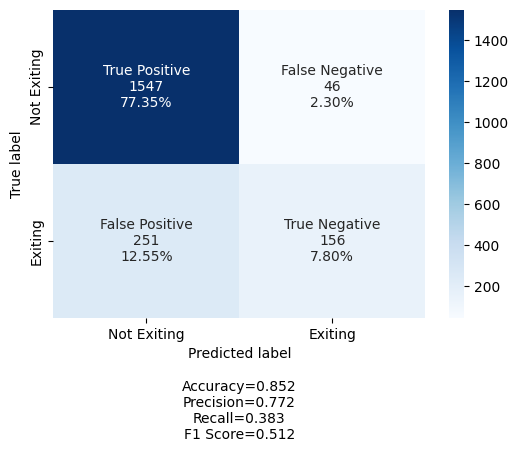

In [183]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Still pretty terrible performance on recall.
* Lets simplify again and raise dropout

### Neural Network (64,32) with Adam & Dropout (0.5, 0.5)

In [184]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [185]:
model_name = "Neural Network (64,32) with Adam & Dropout (0.5, 0.5)"

In [186]:
#Initializing the neural network
adam_dropout_model3 = Sequential()
adam_dropout_model3.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
adam_dropout_model3.add(Dropout(0.5))
adam_dropout_model3.add(Dense(32,activation='relu'))
adam_dropout_model3.add(Dropout(0.5))
adam_dropout_model3.add(Dense(1, activation = 'sigmoid'))

In [187]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.01)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [188]:
## compile the model with binary cross entropy as loss function and recall as the metric.
adam_dropout_model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [189]:
# Summary of the model
adam_dropout_model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

**Loss function**

In [190]:
#Fitting the ANN with batch_size = 32 and 100 epochs
adam_dropout_history3 = adam_dropout_model3.fit(
    X_train,y_train,
    batch_size=32, 
    epochs=epochs,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4951 - recall: 0.0881 - val_loss: 0.4170 - val_recall: 0.0737
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4314 - recall: 0.1775 - val_loss: 0.3998 - val_recall: 0.1695
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4235 - recall: 0.1973 - val_loss: 0.3823 - val_recall: 0.2162
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4125 - recall: 0.2549 - val_loss: 0.3717 - val_recall: 0.3022
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3973 - recall: 0.2854 - val_loss: 0.3701 - val_recall: 0.2678
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3948 - recall: 0.3105 - val_loss: 0.3707 - val_recall: 0.2924
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3886 - recall: 0.2783 - val_loss: 0.3664 - val_recall: 0.3391
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3782 - recall: 0.3142 - val_loss: 0.3681 - val_recall: 0.3268
Epoch 9/

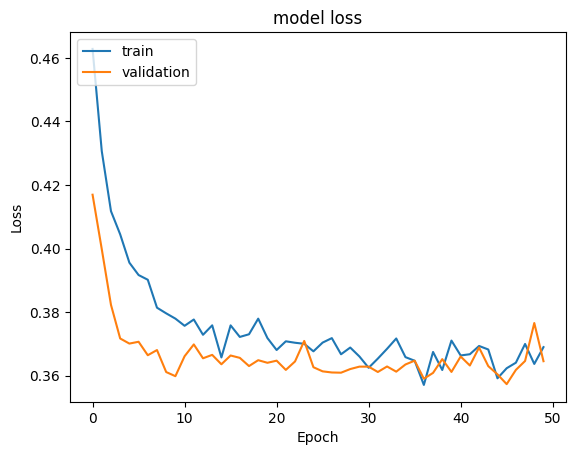

In [191]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_history3.history['loss'],adam_dropout_history3.history['val_loss'])

* The loss in the validation and train are similar, though divergent, and showing more noise in both sets

In [192]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_dropout_history3.history['recall'],adam_dropout_history3.history['val_recall'])

In [193]:
#Predicting the results using best as a threshold
y_train_pred = adam_dropout_model3.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [194]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = adam_dropout_model3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [195]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.348324
Name: Neural Network (64,32) with Adam & Dropout (0.5, 0.5), dtype: float64
recall    0.304668
Name: Neural Network (64,32) with Adam & Dropout (0.5, 0.5), dtype: float64


**Classification report**

In [196]:
#classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4777
           1       0.91      0.35      0.50      1223

    accuracy                           0.86      6000
   macro avg       0.88      0.67      0.71      6000
weighted avg       0.87      0.86      0.83      6000



In [197]:
#classification report
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1593
           1       0.83      0.30      0.45       407

    accuracy                           0.85      2000
   macro avg       0.84      0.64      0.68      2000
weighted avg       0.84      0.85      0.82      2000



**Confusion matrix**

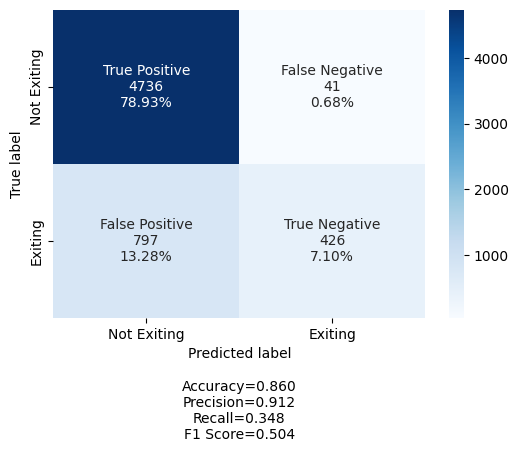

In [198]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

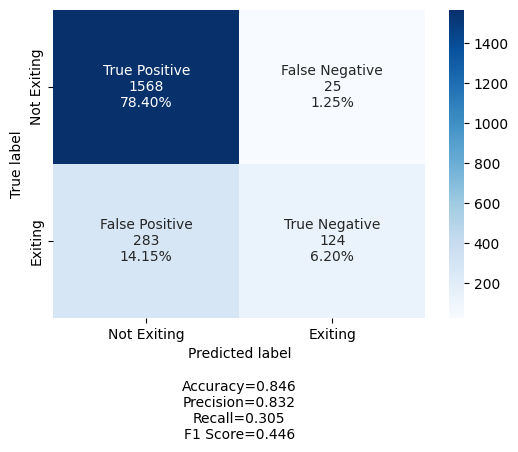

In [199]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* This model is likely too simple to really do much.
* Terrible recall performance.
* Add some layers back infor next model.
* Try He normal to see how it affects a previous model.

### Neural Network (64,32,16,8) with Adam, He Normal & Dropout (0.4, 0.3, 0.2, 0.1)

In [200]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [201]:
model_name = "Neural Network (64,32,16,8) with Adam, He Normal & Dropout (0.4, 0.3, 0.2, 0.1)"

In [202]:
#Initializing the neural network
adam_he_dropout_model = Sequential()
adam_he_dropout_model.add(Dense(64,activation='relu', kernel_initializer="he_normal", input_dim = X_train.shape[1]))
adam_he_dropout_model.add(Dropout(0.4))
adam_he_dropout_model.add(Dense(32,activation='relu', kernel_initializer="he_normal"))
adam_he_dropout_model.add(Dropout(0.3))
adam_he_dropout_model.add(Dense(16,activation='relu', kernel_initializer="he_normal"))
adam_he_dropout_model.add(Dropout(0.2))
adam_he_dropout_model.add(Dense(8,activation='relu', kernel_initializer="he_normal"))
adam_he_dropout_model.add(Dropout(0.1))
adam_he_dropout_model.add(Dense(1, activation = 'sigmoid', kernel_initializer="he_normal"))

In [203]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [204]:
## compile the model with binary cross entropy as loss function and recall as the metric.
adam_he_dropout_model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [205]:
# Summary of the model
adam_he_dropout_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

**Loss function**

In [206]:
#Fitting the ANN
adam_he_dropout_history = adam_he_dropout_model.fit(
    X_train,y_train,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7711 - recall: 0.4888 - val_loss: 0.4644 - val_recall: 0.0000e+00
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5203 - recall: 0.0572 - val_loss: 0.4496 - val_recall: 0.0000e+00
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4879 - recall: 0.0408 - val_loss: 0.4407 - val_recall: 0.0000e+00
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4721 - recall: 0.0616 - val_loss: 0.4360 - val_recall: 0.0000e+00
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4680 - recall: 0.0574 - val_loss: 0.4321 - val_recall: 0.0000e+00
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4641 - recall: 0.0563 - val_loss: 0.4275 - val_recall: 0.0025
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4593 - recall: 0.0803 - val_loss: 0.4260 - val_recall: 0.0000e+00
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4505 - recall: 0.0973 - val_loss: 0.4241 - val_recall: 0.0098


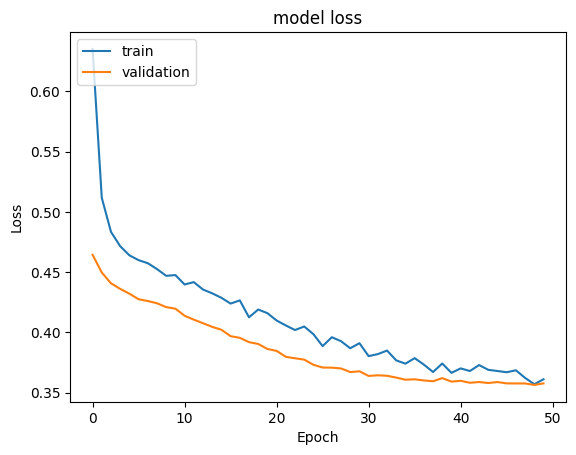

In [207]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_he_dropout_history.history['loss'],adam_he_dropout_history.history['val_loss'])

* The loss in the validation and train are similar, though divergent, and some noise in both sets though much more in training due to dropout

In [208]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_he_dropout_history.history['recall'],adam_he_dropout_history.history['val_recall'])

In [209]:
#Predicting the results using best as a threshold
y_train_pred = adam_he_dropout_model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [210]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = adam_he_dropout_model.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [211]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.376124
Name: Neural Network (64,32,16,8) with Adam, He Normal & Dropout (0.4, 0.3, 0.2, 0.1), dtype: float64
recall    0.331695
Name: Neural Network (64,32,16,8) with Adam, He Normal & Dropout (0.4, 0.3, 0.2, 0.1), dtype: float64


**Classification report**

In [212]:
#classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4777
           1       0.87      0.38      0.53      1223

    accuracy                           0.86      6000
   macro avg       0.87      0.68      0.72      6000
weighted avg       0.86      0.86      0.84      6000



In [213]:
#classification report
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1593
           1       0.78      0.33      0.47       407

    accuracy                           0.85      2000
   macro avg       0.82      0.65      0.69      2000
weighted avg       0.84      0.85      0.82      2000



**Confusion matrix**

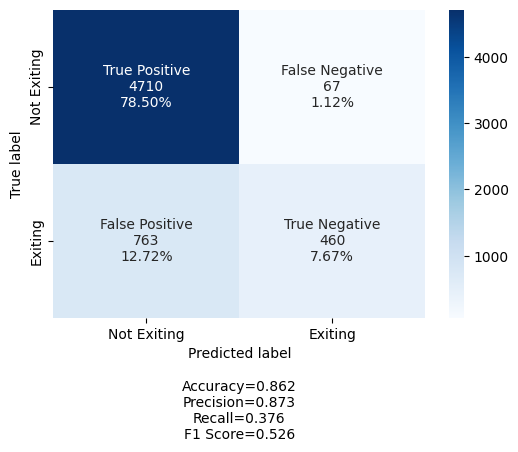

In [214]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

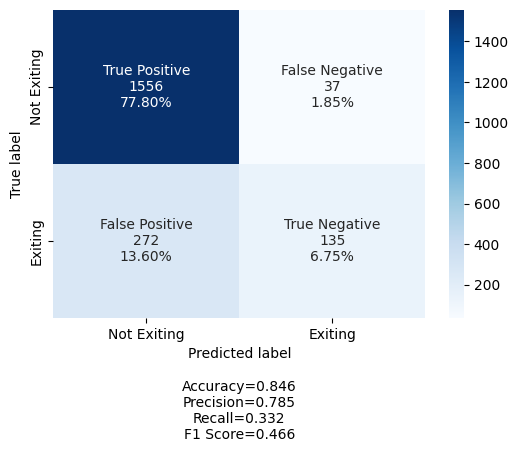

In [215]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Definitely going the wrong way on these models.
* he normal does not seem to have helped.
* Recall is not acceptable.
* Resimplify and lets try some batch normalization.

### Neural Network (64,32,16,8) with Adam & Batch Normalization

In [216]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [217]:
model_name = "Neural Network (64,32,16,8) with Adam & Batch Normalization"

In [218]:
#Initializing the neural network
adam_batch_model = Sequential()
adam_batch_model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
adam_batch_model.add(BatchNormalization())
adam_batch_model.add(Dense(32,activation='relu'))
adam_batch_model.add(BatchNormalization())
adam_batch_model.add(Dense(16,activation='relu'))
adam_batch_model.add(BatchNormalization())
adam_batch_model.add(Dense(8,activation='relu'))
adam_batch_model.add(BatchNormalization())
adam_batch_model.add(Dense(1, activation = 'sigmoid'))

In [219]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [220]:
## compile the model with binary cross entropy as loss function and recall as the metric.
adam_batch_model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [221]:
# Summary of the model
adam_batch_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001 (15.63 KB)

 Trainable params: 3,761 (14.69 KB)

 Non-trainable params: 240 (960.00 B)

**Loss function**

In [222]:
#Fitting the ANN with
adam_batch_history = adam_batch_model.fit(
    X_train,y_train,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.8402 - recall: 0.6037 - val_loss: 0.5860 - val_recall: 0.2899
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5146 - recall: 0.5745 - val_loss: 0.4742 - val_recall: 0.2752
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4283 - recall: 0.5071 - val_loss: 0.4114 - val_recall: 0.3170
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3754 - recall: 0.4960 - val_loss: 0.3840 - val_recall: 0.3735
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3444 - recall: 0.4964 - val_loss: 0.3733 - val_recall: 0.3931
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3271 - recall: 0.4989 - val_loss: 0.3716 - val_recall: 0.3931
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3126 - recall: 0.5199 - val_loss: 0.3724 - val_recall: 0.3907
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3025 - recall: 0.5286 - val_loss: 0.3734 - val_recall: 0.3931
Epoch 9/50
94/94 ━━━━━━━

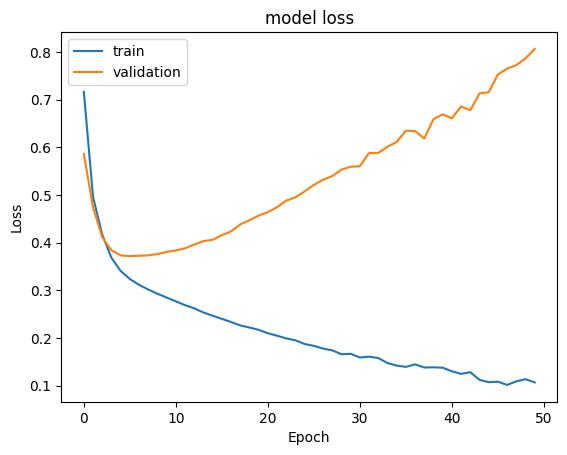

In [223]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_batch_history.history['loss'],adam_batch_history.history['val_loss'])

* The loss in the validation and train are drastically divergent after epoch 4 or so.  Small evidence of noise in both sets.

In [224]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_batch_history.history['recall'],adam_batch_history.history['val_recall'])

In [225]:
#Predicting the results using best as a threshold
y_train_pred = adam_batch_model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [226]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = adam_batch_model.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [227]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.683565
Name: Neural Network (64,32,16,8) with Adam & Batch Normalization, dtype: float64
recall    0.461916
Name: Neural Network (64,32,16,8) with Adam & Batch Normalization, dtype: float64


**Classification report**

In [228]:
#classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      4777
           1       0.77      0.68      0.72      1223

    accuracy                           0.89      6000
   macro avg       0.85      0.82      0.83      6000
weighted avg       0.89      0.89      0.89      6000



In [229]:
#classification report
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1593
           1       0.54      0.46      0.50       407

    accuracy                           0.81      2000
   macro avg       0.71      0.68      0.69      2000
weighted avg       0.80      0.81      0.81      2000



**Confusion matrix**

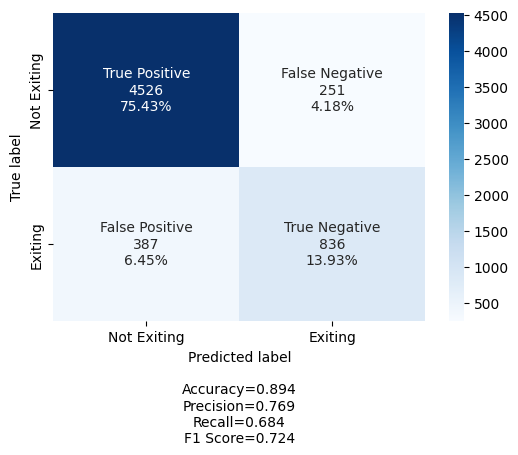

In [230]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

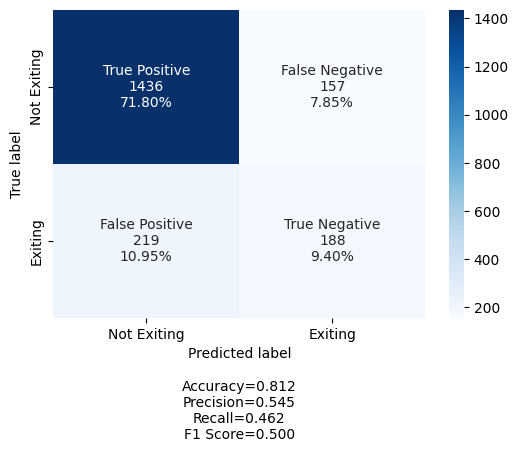

In [231]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Batch Normalization didn't do much to help here, still pretty bad recall performance.
* Lets combine with dropout for the next model.

### Neural Network (64,32,16,8) with Adam, Batch Normalization & Dropout (0.4, 0.3, 0.2, 0.1)

In [232]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [233]:
model_name = "Neural Network (64,32,16,8) with Adam, Batch Normalization & Dropout (0.4, 0.3, 0.2, 0.1)"

In [234]:
#Initializing the neural network
adam_batch_dropout_model = Sequential()
adam_batch_dropout_model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
adam_batch_dropout_model.add(BatchNormalization())
adam_batch_dropout_model.add(Dropout(0.4))
adam_batch_dropout_model.add(Dense(32,activation='relu'))
adam_batch_dropout_model.add(BatchNormalization())
adam_batch_dropout_model.add(Dropout(0.3))
adam_batch_dropout_model.add(Dense(16,activation='relu'))
adam_batch_dropout_model.add(BatchNormalization())
adam_batch_dropout_model.add(Dropout(0.2))
adam_batch_dropout_model.add(Dense(8,activation='relu'))
adam_batch_dropout_model.add(BatchNormalization())
adam_batch_dropout_model.add(Dropout(0.1))
adam_batch_dropout_model.add(Dense(1, activation = 'sigmoid'))

In [235]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [236]:
## compile the model with binary cross entropy as loss function and recall as the metric.
adam_batch_dropout_model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [237]:
# Summary of the model
adam_batch_dropout_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001 (15.63 KB)

 Trainable params: 3,761 (14.69 KB)

 Non-trainable params: 240 (960.00 B)

**Loss function**

In [238]:
#Fitting the ANN
adam_batch_dropout_history = adam_batch_dropout_model.fit(
    X_train,y_train,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7578 - recall: 0.4486 - val_loss: 0.5735 - val_recall: 0.1106
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6124 - recall: 0.4395 - val_loss: 0.5079 - val_recall: 0.1597
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5428 - recall: 0.3831 - val_loss: 0.4586 - val_recall: 0.1892
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4917 - recall: 0.3463 - val_loss: 0.4274 - val_recall: 0.2678
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4627 - recall: 0.3197 - val_loss: 0.4091 - val_recall: 0.2604
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4371 - recall: 0.2924 - val_loss: 0.3958 - val_recall: 0.2875
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4320 - recall: 0.2972 - val_loss: 0.3866 - val_recall: 0.3194
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4202 - recall: 0.3022 - val_loss: 0.3802 - val_recall: 0.2998
Epoch 9/50
94/94 ━━━━━━━

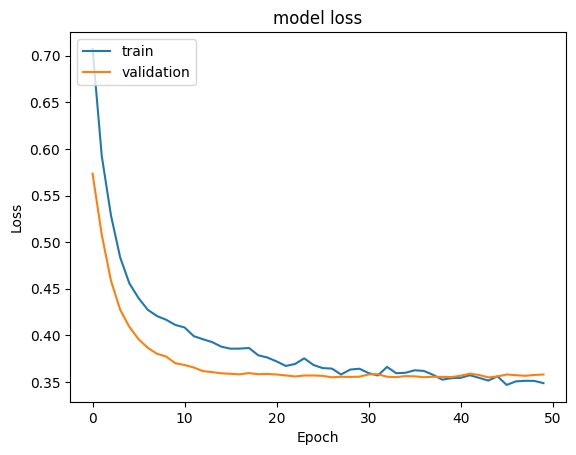

In [239]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_batch_dropout_history.history['loss'],adam_batch_dropout_history.history['val_loss'])

* The loss in the validation and train are similar, and begin converging around epoch 38, and some noise in both sets though much more in training due to dropout

In [240]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_batch_dropout_history.history['recall'],adam_batch_dropout_history.history['val_recall'])

In [241]:
#Predicting the results using best as a threshold
y_train_pred = adam_batch_dropout_model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [242]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = adam_batch_dropout_model.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [243]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.413737
Name: Neural Network (64,32,16,8) with Adam, Batch Normalization & Dropout (0.4, 0.3, 0.2, 0.1), dtype: float64
recall    0.366093
Name: Neural Network (64,32,16,8) with Adam, Batch Normalization & Dropout (0.4, 0.3, 0.2, 0.1), dtype: float64


**Classification report**

In [244]:
#classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4777
           1       0.84      0.41      0.55      1223

    accuracy                           0.86      6000
   macro avg       0.85      0.70      0.74      6000
weighted avg       0.86      0.86      0.85      6000



In [245]:
#classification report
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1593
           1       0.81      0.37      0.50       407

    accuracy                           0.85      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.85      0.83      2000



**Confusion matrix**

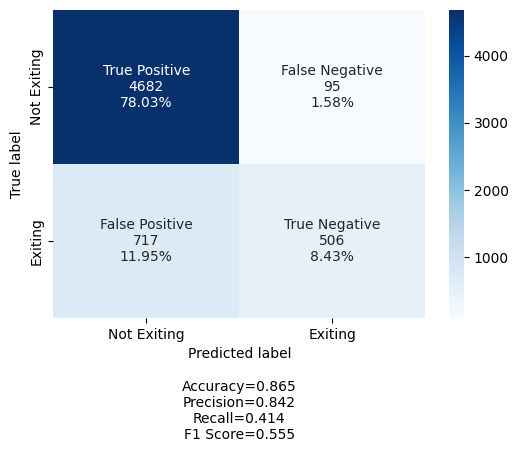

In [246]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

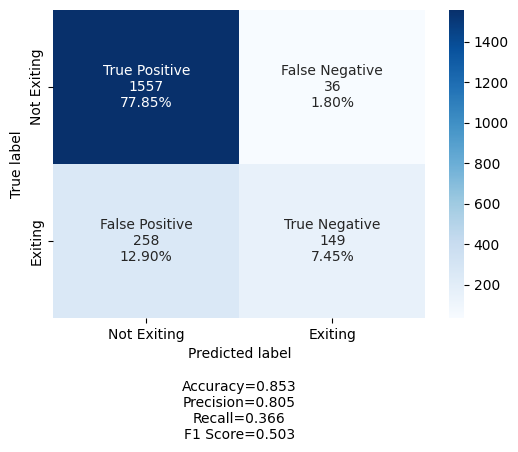

In [247]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Even worse performance.  In this case I do not think batch normalization should be used at all.
* Next model we will retry SGD, but use SMOTE to have better data to train on.

### Neural Network (64,32,16,8) with SMOTE & SGD Optimizer

In [248]:
sm  = SMOTE(random_state=42)
# fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (9554, 11)
After UpSampling, the shape of train_y: (9554,) 



In [249]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [250]:
model_name = "Neural Network (64,32,16,8) with SMOTE & SGD"

In [251]:
#Initializing the model
sgd_smote_model = Sequential()
sgd_smote_model.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
sgd_smote_model.add(Dense(32,activation='relu'))
sgd_smote_model.add(Dense(16,activation='relu'))
sgd_smote_model.add(Dense(8,activation='relu'))
sgd_smote_model.add(Dense(1, activation = 'sigmoid'))

In [252]:
# use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [253]:
# compile the model with binary cross entropy as loss function and recall as the metric
sgd_smote_model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [254]:
sgd_smote_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [255]:
#Fitting the ANN
sgd_smote_history = sgd_smote_model.fit(
    X_train_smote, y_train_smote,
    batch_size=batch_size, 
    epochs=epochs,
    #class_weight=cw_dict,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6940 - recall: 0.3086 - val_loss: 0.6787 - val_recall: 0.5332
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.6782 - recall: 0.5645 - val_loss: 0.6559 - val_recall: 0.6118
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.6551 - recall: 0.5830 - val_loss: 0.6205 - val_recall: 0.6658
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.6234 - recall: 0.6380 - val_loss: 0.5968 - val_recall: 0.7174
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.5951 - recall: 0.6714 - val_loss: 0.5836 - val_recall: 0.7273
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5763 - recall: 0.6981 - val_loss: 0.5781 - val_recall: 0.7322
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.5652 - recall: 0.7168 - val_loss: 0.5760 - val_recall: 0.7396
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5571 - recall: 0.7283 - val_loss: 0.5725 - val_recall: 0.744

**Loss function**

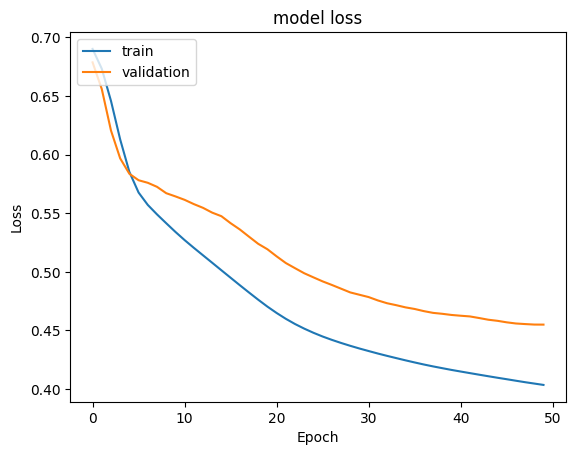

In [256]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(sgd_smote_history.history['loss'],sgd_smote_history.history['val_loss'])

* The loss in the validation and train are similar, though divergent, with less noise evident.

In [257]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(sgd_smote_history.history['recall'],sgd_smote_history.history['val_recall'])

In [258]:
y_train_pred = sgd_smote_model.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [259]:
y_val_pred = sgd_smote_model.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [260]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.805526
Name: Neural Network (64,32,16,8) with SMOTE & SGD, dtype: float64
recall    0.727273
Name: Neural Network (64,32,16,8) with SMOTE & SGD, dtype: float64


**Classification report**

In [261]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      4777
           1       0.82      0.81      0.81      4777

    accuracy                           0.81      9554
   macro avg       0.81      0.81      0.81      9554
weighted avg       0.81      0.81      0.81      9554



In [262]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.49      0.73      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



**Confusion matrix**

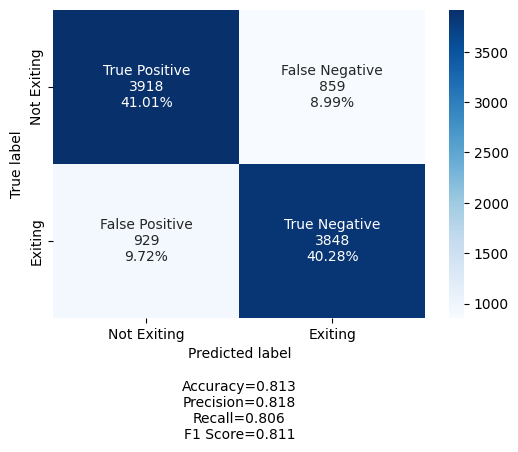

In [263]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

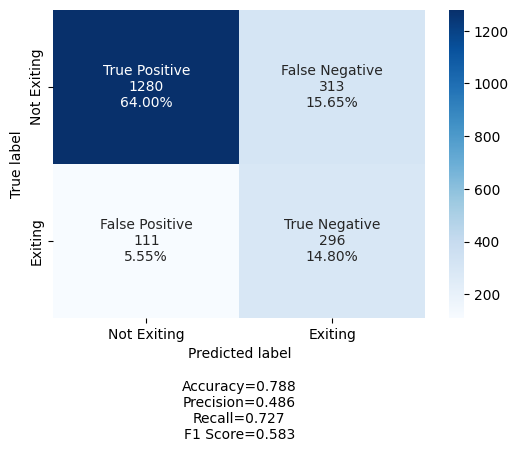

In [264]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Recall scores improving.
* Lets try with Adam.

### Neural Network (64,32,16,8) with SMOTE & Adam Optimizer

In [265]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [266]:
model_name = "Neural Network (64,32,16,8) with SMOTE & Adam"

In [267]:
#Initializing the model
adam_smote_model = Sequential()
adam_smote_model.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
adam_smote_model.add(Dense(32,activation='relu'))
adam_smote_model.add(Dense(16,activation='relu'))
adam_smote_model.add(Dense(8,activation='relu'))
adam_smote_model.add(Dense(1, activation = 'sigmoid'))

In [268]:
adam_smote_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [269]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [270]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_smote_model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [271]:
adam_smote_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [272]:
#Fitting the ANN

adam_smote_history = adam_smote_model.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6328 - recall: 0.5413 - val_loss: 0.5316 - val_recall: 0.7346
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5091 - recall: 0.7609 - val_loss: 0.4842 - val_recall: 0.7543
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4638 - recall: 0.7730 - val_loss: 0.4608 - val_recall: 0.7346
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4445 - recall: 0.7807 - val_loss: 0.4580 - val_recall: 0.7224
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4318 - recall: 0.7911 - val_loss: 0.4555 - val_recall: 0.7076
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4211 - recall: 0.7970 - val_loss: 0.4546 - val_recall: 0.7150
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4126 - recall: 0.8052 - val_loss: 0.4568 - val_recall: 0.7125
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4043 - recall: 0.8111 - val_loss: 0.4567 - val_recall: 0.7125
Epoch 9/

**Loss function**

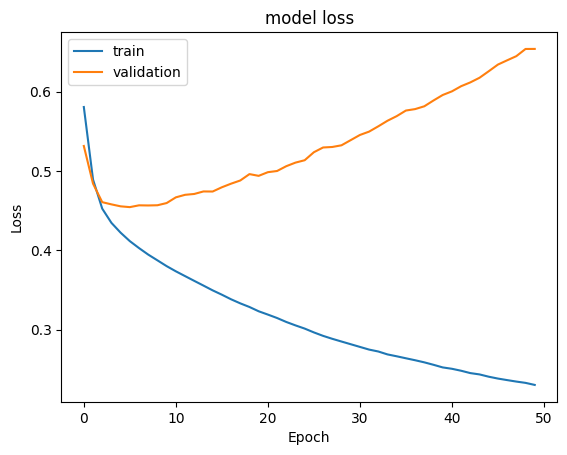

In [273]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_smote_history.history['loss'],adam_smote_history.history['val_loss'])

* The loss in the validation and train diverge after the first couple of epochs.  Small amount of noise evident in validation, while training is smooth.

In [274]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_smote_history.history['recall'],adam_smote_history.history['val_recall'])

In [275]:
y_train_pred = adam_smote_model.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [276]:
y_val_pred = adam_smote_model.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [277]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.941386
Name: Neural Network (64,32,16,8) with SMOTE & Adam, dtype: float64
recall    0.651106
Name: Neural Network (64,32,16,8) with SMOTE & Adam, dtype: float64


**Classification report**

In [278]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      4777
           1       0.88      0.94      0.91      4777

    accuracy                           0.91      9554
   macro avg       0.91      0.91      0.91      9554
weighted avg       0.91      0.91      0.91      9554



In [279]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1593
           1       0.48      0.65      0.56       407

    accuracy                           0.79      2000
   macro avg       0.69      0.74      0.71      2000
weighted avg       0.82      0.79      0.80      2000



**Confusion matrix**

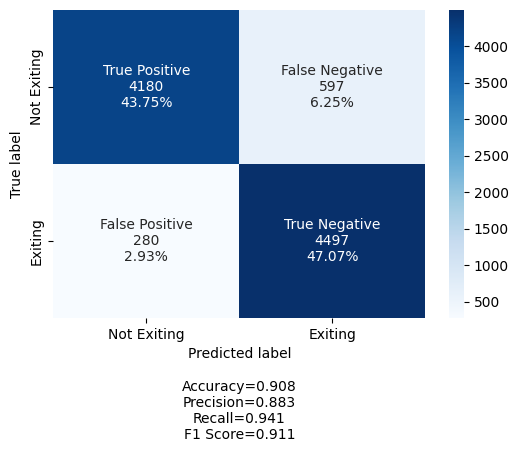

In [280]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

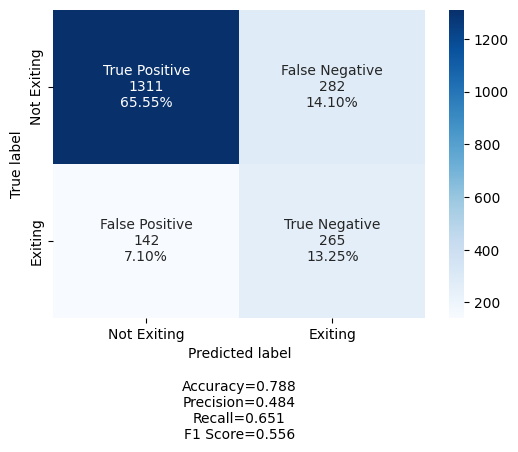

In [281]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Good performance on training set recall, but vlaidation is going the wrong way.
* Lets see if adding dropout back in helps.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [282]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [283]:
model_name = "Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1)"

In [284]:
#Initializing the model
adam_dropout_smote_model001 = Sequential()
adam_dropout_smote_model001.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
adam_dropout_smote_model001.add(Dropout(0.8))
adam_dropout_smote_model001.add(Dense(32,activation='relu'))
adam_dropout_smote_model001.add(Dropout(0.4))
adam_dropout_smote_model001.add(Dense(16,activation='relu'))
adam_dropout_smote_model001.add(Dropout(0.2))
adam_dropout_smote_model001.add(Dense(8,activation='relu'))
adam_dropout_smote_model001.add(Dropout(0.1))
adam_dropout_smote_model001.add(Dense(1, activation = 'sigmoid'))

In [285]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [286]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_dropout_smote_model001.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [287]:
adam_dropout_smote_model001.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [288]:
adam_dropout_smote_history001 = adam_dropout_smote_model001.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6936 - recall: 0.5652 - val_loss: 0.6665 - val_recall: 0.4373
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6737 - recall: 0.5789 - val_loss: 0.6285 - val_recall: 0.6658
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6447 - recall: 0.6325 - val_loss: 0.5874 - val_recall: 0.6757
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6238 - recall: 0.6817 - val_loss: 0.5840 - val_recall: 0.6929
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6102 - recall: 0.7034 - val_loss: 0.5659 - val_recall: 0.6806
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5994 - recall: 0.7122 - val_loss: 0.5747 - val_recall: 0.6929
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5941 - recall: 0.7199 - val_loss: 0.5692 - val_recall: 0.7199
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5940 - recall: 0.7292 - val_loss: 0.5688 - val_recall: 0.7322
Epoch 9/

**Loss function**

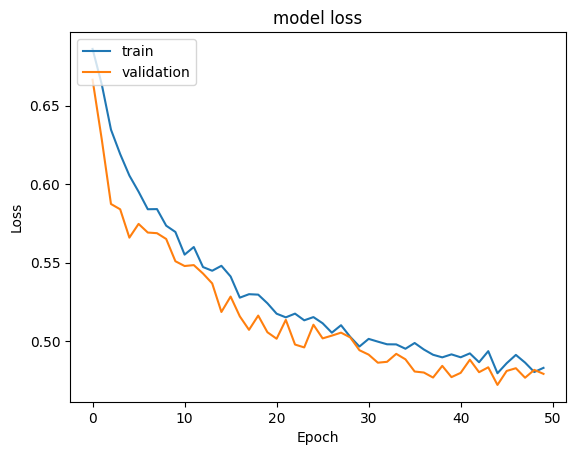

In [289]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_smote_history001.history['loss'],adam_dropout_smote_history001.history['val_loss'])

* The loss in the validation and train are similar, though divergent, and shows a bit of noise in both sets, likely due to dropout and oversampling.

In [290]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_dropout_smote_history001.history['recall'],adam_dropout_smote_history001.history['val_recall'])

In [291]:
y_train_pred = adam_dropout_smote_model001.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [292]:
y_val_pred = adam_dropout_smote_model001.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [293]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.793804
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1), dtype: float64
recall    0.72973
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1), dtype: float64


**Classification report**

In [294]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4777
           1       0.81      0.79      0.80      4777

    accuracy                           0.80      9554
   macro avg       0.80      0.80      0.80      9554
weighted avg       0.80      0.80      0.80      9554



In [295]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.73      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.78      0.80      2000



**Confusion matrix**

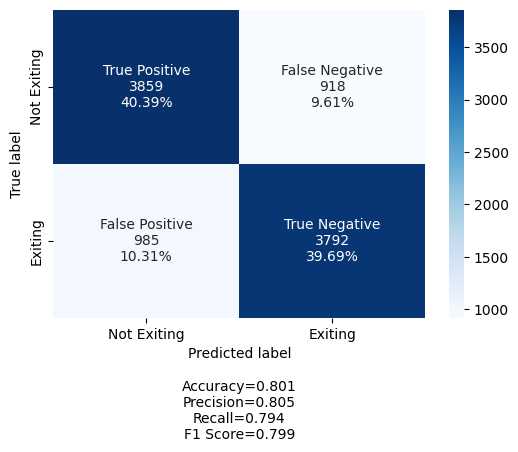

In [296]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

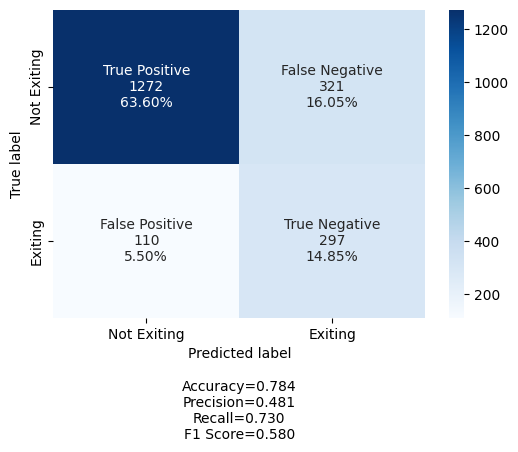

In [297]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Dropout seems to have helped improve recall scores.
* Lets try adjusting the Learning rate.  We'll start with 0.001

### Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.001)

In [298]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [299]:
model_name = "Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.001)"

In [300]:
#Initializing the model
adam_dropout_smote_model001 = Sequential()
adam_dropout_smote_model001.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
adam_dropout_smote_model001.add(Dropout(0.8))
adam_dropout_smote_model001.add(Dense(32,activation='relu'))
adam_dropout_smote_model001.add(Dropout(0.4))
adam_dropout_smote_model001.add(Dense(16,activation='relu'))
adam_dropout_smote_model001.add(Dropout(0.2))
adam_dropout_smote_model001.add(Dense(8,activation='relu'))
adam_dropout_smote_model001.add(Dropout(0.1))
adam_dropout_smote_model001.add(Dense(1, activation = 'sigmoid'))

In [301]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [302]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_dropout_smote_model001.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [303]:
adam_dropout_smote_model001.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [304]:
adam_dropout_smote_history001 = adam_dropout_smote_model001.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6936 - recall: 0.5652 - val_loss: 0.6665 - val_recall: 0.4373
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6737 - recall: 0.5789 - val_loss: 0.6285 - val_recall: 0.6658
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6447 - recall: 0.6325 - val_loss: 0.5874 - val_recall: 0.6757
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6238 - recall: 0.6817 - val_loss: 0.5840 - val_recall: 0.6929
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6102 - recall: 0.7034 - val_loss: 0.5659 - val_recall: 0.6806
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5994 - recall: 0.7122 - val_loss: 0.5747 - val_recall: 0.6929
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5941 - recall: 0.7199 - val_loss: 0.5692 - val_recall: 0.7199
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5940 - recall: 0.7292 - val_loss: 0.5688 - val_recall: 0.7322
Epoch 9/

**Loss function**

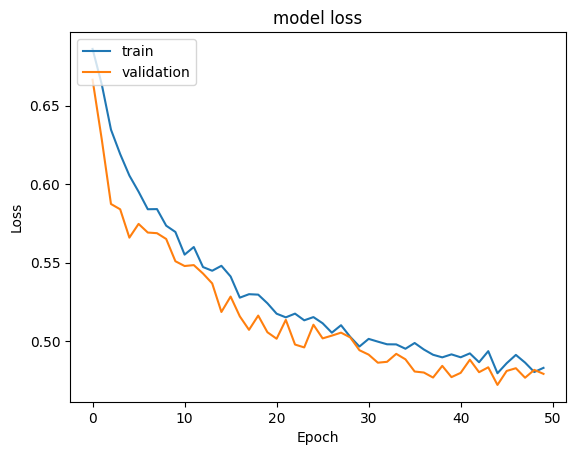

In [305]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_smote_history001.history['loss'],adam_dropout_smote_history001.history['val_loss'])

* The loss in the validation and train are similar, though divergent, and shows a bit of noise in both sets, likely due to dropout and oversampling.

In [306]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_dropout_smote_history001.history['recall'],adam_dropout_smote_history001.history['val_recall'])

In [307]:
y_train_pred = adam_dropout_smote_model001.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [308]:
y_val_pred = adam_dropout_smote_model001.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [309]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.793804
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.001), dtype: float64
recall    0.72973
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.001), dtype: float64


**Classification report**

In [310]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4777
           1       0.81      0.79      0.80      4777

    accuracy                           0.80      9554
   macro avg       0.80      0.80      0.80      9554
weighted avg       0.80      0.80      0.80      9554



In [311]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.73      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.78      0.80      2000



**Confusion matrix**

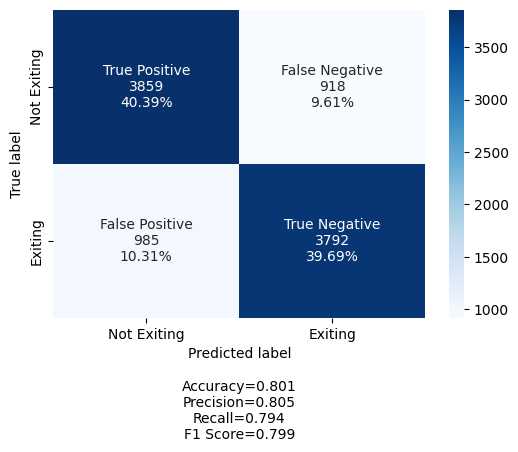

In [312]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

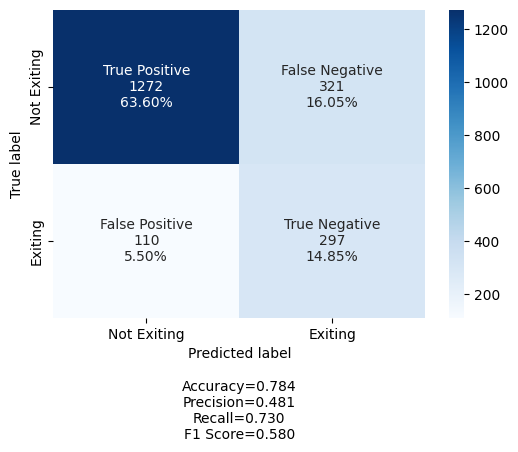

In [313]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* LR=0.001 didnt change the scores, lets try 0.002.

### Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.002)

In [314]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [315]:
model_name = "Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.002)"

In [316]:
#Initializing the model
adam_dropout_smote_model002 = Sequential()
adam_dropout_smote_model002.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
adam_dropout_smote_model002.add(Dropout(0.8))
adam_dropout_smote_model002.add(Dense(32,activation='relu'))
adam_dropout_smote_model002.add(Dropout(0.4))
adam_dropout_smote_model002.add(Dense(16,activation='relu'))
adam_dropout_smote_model002.add(Dropout(0.2))
adam_dropout_smote_model002.add(Dense(8,activation='relu'))
adam_dropout_smote_model002.add(Dropout(0.1))
adam_dropout_smote_model002.add(Dense(1, activation = 'sigmoid'))

In [317]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [318]:
#  compile the model with binary cross entropy as loss function and recall as the metric
adam_dropout_smote_model002.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [319]:
adam_dropout_smote_model002.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [320]:
adam_dropout_smote_history002 = adam_dropout_smote_model002.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6883 - recall: 0.5466 - val_loss: 0.6423 - val_recall: 0.6929
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6478 - recall: 0.6209 - val_loss: 0.6048 - val_recall: 0.7248
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6203 - recall: 0.6821 - val_loss: 0.5800 - val_recall: 0.7076
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5970 - recall: 0.7129 - val_loss: 0.5853 - val_recall: 0.7396
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5849 - recall: 0.7293 - val_loss: 0.5653 - val_recall: 0.7469
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5741 - recall: 0.7282 - val_loss: 0.5781 - val_recall: 0.7690
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5669 - recall: 0.7402 - val_loss: 0.5644 - val_recall: 0.7617
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5667 - recall: 0.7326 - val_loss: 0.5533 - val_recall: 0.7715
Epoch 9/

**Loss function**

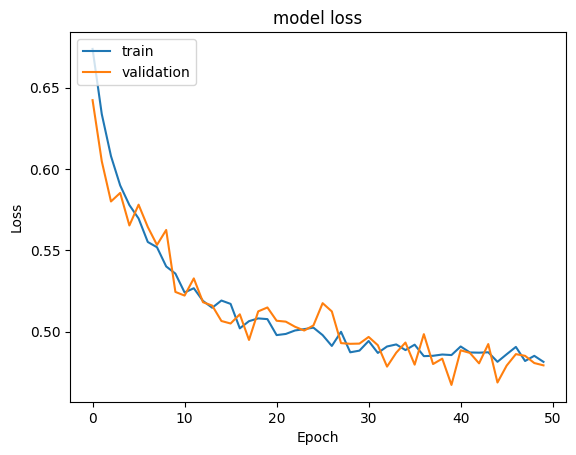

In [321]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_smote_history002.history['loss'],adam_dropout_smote_history002.history['val_loss'])

* The loss in the validation and train are similar, though divergent, and shows a bit of noise in both sets, likely due to dropout and oversampling.

In [322]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_dropout_smote_history002.history['recall'],adam_dropout_smote_history002.history['val_recall'])

In [323]:
y_train_pred = adam_dropout_smote_model002.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [324]:
y_val_pred = adam_dropout_smote_model002.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [325]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.789617
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.002), dtype: float64
recall    0.724816
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.002), dtype: float64


**Classification report**

In [326]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4777
           1       0.81      0.79      0.80      4777

    accuracy                           0.80      9554
   macro avg       0.80      0.80      0.80      9554
weighted avg       0.80      0.80      0.80      9554



In [327]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



**Confusion matrix**

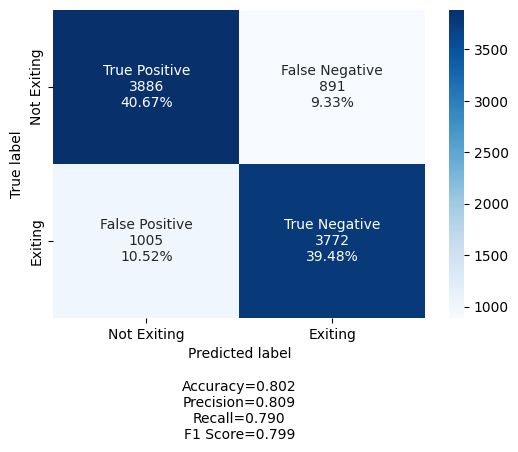

In [328]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

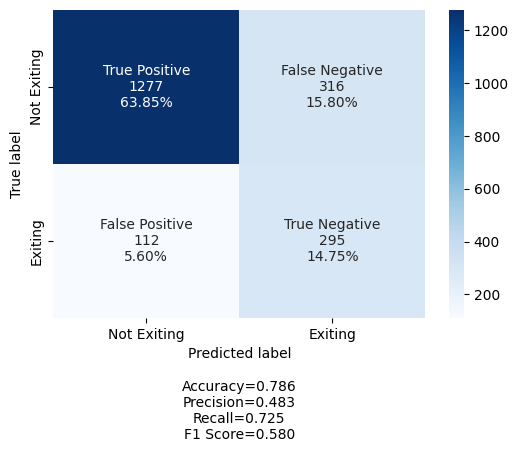

In [329]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* 0.002 dropped the score a small amount.
* Lets try an order of magnitude shift.

### Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01)

In [330]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [331]:
model_name = "Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01)"

In [332]:
#Initializing the model
adam_dropout_smote_model01 = Sequential()
adam_dropout_smote_model01.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
adam_dropout_smote_model01.add(Dropout(0.8))
adam_dropout_smote_model01.add(Dense(32,activation='relu'))
adam_dropout_smote_model01.add(Dropout(0.4))
adam_dropout_smote_model01.add(Dense(16,activation='relu'))
adam_dropout_smote_model01.add(Dropout(0.2))
adam_dropout_smote_model01.add(Dense(8,activation='relu'))
adam_dropout_smote_model01.add(Dropout(0.1))
adam_dropout_smote_model01.add(Dense(1, activation = 'sigmoid'))

In [333]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [334]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_dropout_smote_model01.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [335]:
adam_dropout_smote_model01.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [336]:
adam_dropout_smote_history01 = adam_dropout_smote_model01.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6688 - recall: 0.5720 - val_loss: 0.5680 - val_recall: 0.7420
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5985 - recall: 0.7138 - val_loss: 0.5430 - val_recall: 0.7469
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5860 - recall: 0.7117 - val_loss: 0.5870 - val_recall: 0.8231
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5708 - recall: 0.7045 - val_loss: 0.5388 - val_recall: 0.7641
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5570 - recall: 0.7177 - val_loss: 0.5326 - val_recall: 0.7838
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5527 - recall: 0.7159 - val_loss: 0.5367 - val_recall: 0.8354
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5464 - recall: 0.7088 - val_loss: 0.5327 - val_recall: 0.7985
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5472 - recall: 0.7244 - val_loss: 0.5078 - val_recall: 0.8034
Epoch 9/

**Loss function**

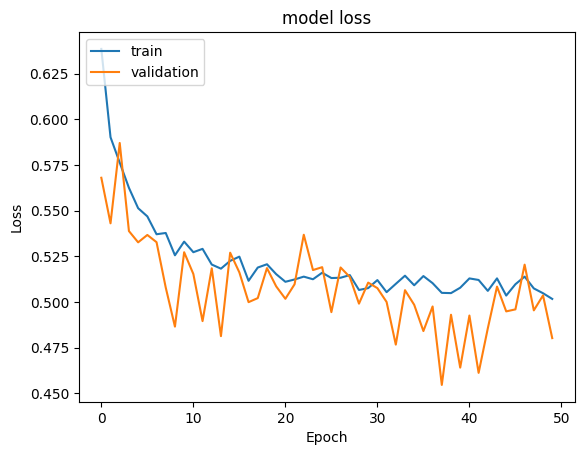

In [337]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_smote_history01.history['loss'],adam_dropout_smote_history01.history['val_loss'])

* The loss in the validation and train are divergent, and shows a bit of noise in both sets though much more extreme in validation.

In [338]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_dropout_smote_history01.history['recall'],adam_dropout_smote_history01.history['val_recall'])

In [339]:
y_train_pred = adam_dropout_smote_model01.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [340]:
y_val_pred = adam_dropout_smote_model01.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [341]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.748796
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01), dtype: float64
recall    0.678133
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01), dtype: float64


**Classification report**

In [342]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      4777
           1       0.82      0.75      0.78      4777

    accuracy                           0.79      9554
   macro avg       0.79      0.79      0.79      9554
weighted avg       0.79      0.79      0.79      9554



In [343]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1593
           1       0.49      0.68      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.82      0.79      0.80      2000



**Confusion matrix**

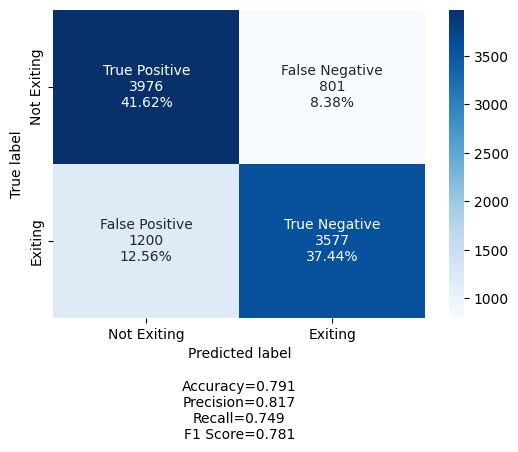

In [344]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

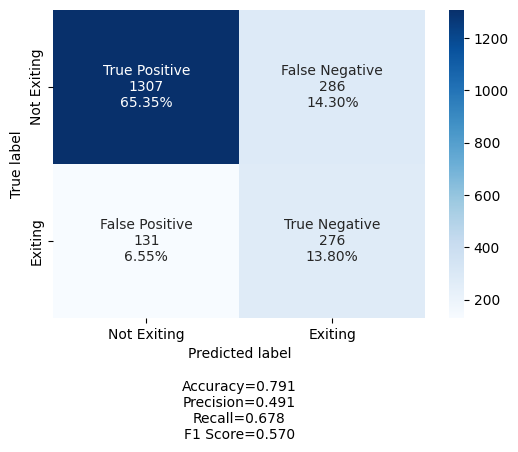

In [345]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* That came out worse, lets try going back to adjusting on the thousandths.

### Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.003)

In [346]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [347]:
model_name = "Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.003)"

In [348]:
#Initializing the model
adam_dropout_smote_model = Sequential()
adam_dropout_smote_model.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
adam_dropout_smote_model.add(Dropout(0.8))
adam_dropout_smote_model.add(Dense(32,activation='relu'))
adam_dropout_smote_model.add(Dropout(0.4))
adam_dropout_smote_model.add(Dense(16,activation='relu'))
adam_dropout_smote_model.add(Dropout(0.2))
adam_dropout_smote_model.add(Dense(8,activation='relu'))
adam_dropout_smote_model.add(Dropout(0.1))
adam_dropout_smote_model.add(Dense(1, activation = 'sigmoid'))

In [349]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [350]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_dropout_smote_model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [351]:
adam_dropout_smote_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [352]:
adam_dropout_smote_history = adam_dropout_smote_model.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6833 - recall: 0.5378 - val_loss: 0.6247 - val_recall: 0.7273
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6334 - recall: 0.6912 - val_loss: 0.5943 - val_recall: 0.7297
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6053 - recall: 0.7153 - val_loss: 0.5781 - val_recall: 0.7420
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5816 - recall: 0.7239 - val_loss: 0.5674 - val_recall: 0.7371
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5683 - recall: 0.7251 - val_loss: 0.5552 - val_recall: 0.7543
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5585 - recall: 0.7175 - val_loss: 0.5371 - val_recall: 0.7641
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5524 - recall: 0.7342 - val_loss: 0.5581 - val_recall: 0.8108
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5535 - recall: 0.7260 - val_loss: 0.5361 - val_recall: 0.7887
Epoch 9/

**Loss function**

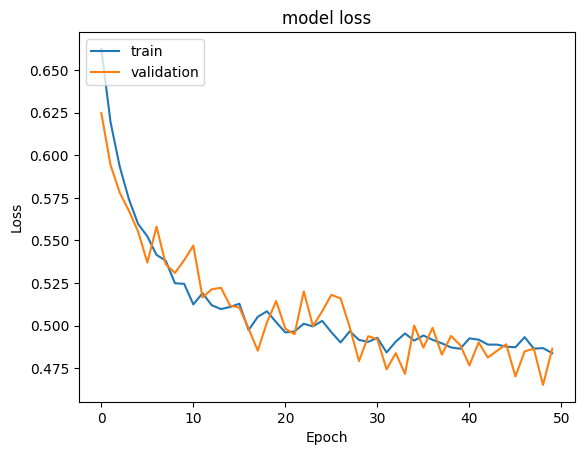

In [353]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_smote_history.history['loss'],adam_dropout_smote_history.history['val_loss'])

* The loss in the validation and train are similar, though divergent, and shows a bit of noise in both sets though much more extreme in validation.

In [354]:
#Plotting Train recall vs Validation recall
#plot_train_vs_val_recall(adam_dropout_smote_history.history['recall'],adam_dropout_smote_history.history['val_recall'])

In [355]:
y_train_pred = adam_dropout_smote_model.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [356]:
y_val_pred = adam_dropout_smote_model.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [357]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.83609
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.003), dtype: float64
recall    0.796069
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.003), dtype: float64


**Classification report**

In [358]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      4777
           1       0.77      0.84      0.80      4777

    accuracy                           0.79      9554
   macro avg       0.80      0.79      0.79      9554
weighted avg       0.80      0.79      0.79      9554



In [359]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      1593
           1       0.45      0.80      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.76      0.78      2000



**Confusion matrix**

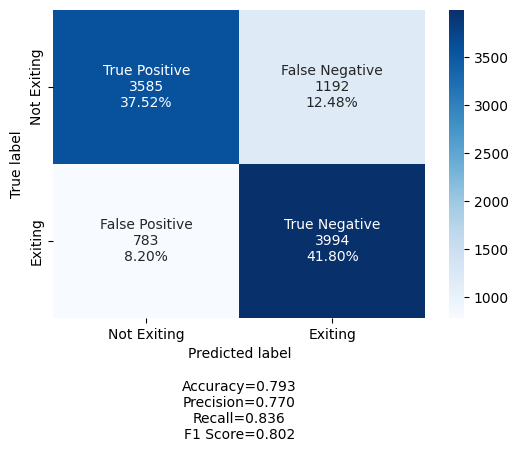

In [360]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

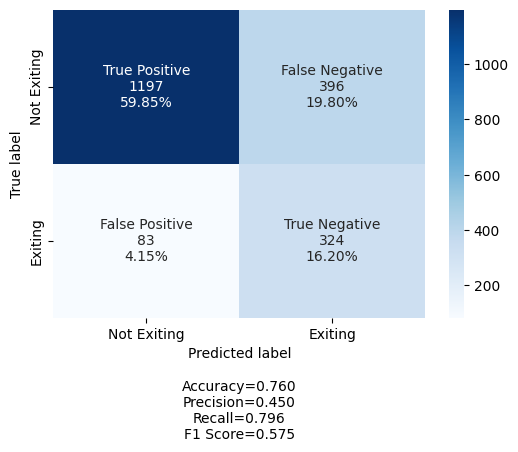

In [361]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Ok, that moved the bar pretty good.  84% on training and 80 on validation is pretty good.
* Lets see if adjusting batch size helps improve things.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, Dropout, Adjusting LR and Batch size

In [362]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [363]:
model_name = "Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01) + Batch (32)"

In [364]:
#Initializing the model
adam_dropout_smote_model2 = Sequential()
adam_dropout_smote_model2.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
adam_dropout_smote_model2.add(Dropout(0.8))
adam_dropout_smote_model2.add(Dense(32,activation='relu'))
adam_dropout_smote_model2.add(Dropout(0.4))
adam_dropout_smote_model2.add(Dense(16,activation='relu'))
adam_dropout_smote_model2.add(Dropout(0.2))
adam_dropout_smote_model2.add(Dense(8,activation='relu'))
adam_dropout_smote_model2.add(Dropout(0.1))
adam_dropout_smote_model2.add(Dense(1, activation = 'sigmoid'))

In [365]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [366]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_dropout_smote_model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [367]:
adam_dropout_smote_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [368]:
adam_dropout_smote_history2 = adam_dropout_smote_model2.fit(
    X_train_smote,y_train_smote,
    batch_size=32, 
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6685 - recall: 0.5311 - val_loss: 0.5719 - val_recall: 0.7346
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6080 - recall: 0.7243 - val_loss: 0.5628 - val_recall: 0.7322
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5825 - recall: 0.6946 - val_loss: 0.5659 - val_recall: 0.7248
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5829 - recall: 0.7207 - val_loss: 0.5347 - val_recall: 0.7052
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5738 - recall: 0.7017 - val_loss: 0.5653 - val_recall: 0.7297
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5572 - recall: 0.7008 - val_loss: 0.5469 - val_recall: 0.8084
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5646 - recall: 0.7199 - val_loss: 0.5105 - val_recall: 0.7838
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5562 - recall: 0.7194 - val_loss: 0.5553 - val_recall: 0.7690
Epoch 9/

**Loss function**

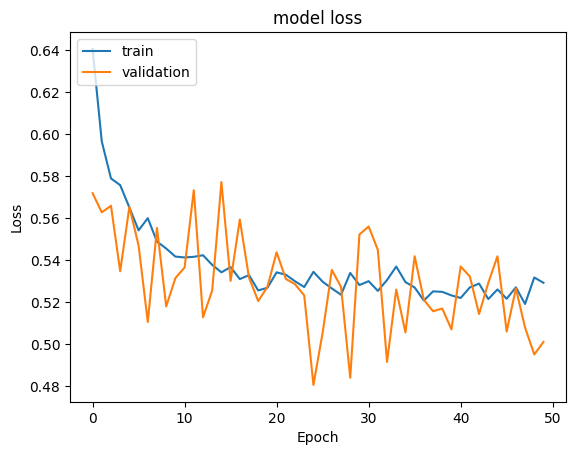

In [369]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_smote_history2.history['loss'],adam_dropout_smote_history2.history['val_loss'])

* The loss in the validation and train are divergent, and shows a bit of noise in both sets though much more extreme in validation.
* We can see right around 22 or 23 the train and validation set are very similar and close.  We should try exiting around that number and see how it improves things.

In [370]:
y_train_pred = adam_dropout_smote_model2.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [371]:
y_val_pred = adam_dropout_smote_model2.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [372]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.868327
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01) + Batch (32), dtype: float64
recall    0.830467
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01) + Batch (32), dtype: float64


**Classification report**

In [373]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      4777
           1       0.74      0.87      0.80      4777

    accuracy                           0.78      9554
   macro avg       0.79      0.78      0.78      9554
weighted avg       0.79      0.78      0.78      9554



In [374]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.94      0.69      0.80      1593
           1       0.41      0.83      0.55       407

    accuracy                           0.72      2000
   macro avg       0.67      0.76      0.67      2000
weighted avg       0.83      0.72      0.75      2000



**Confusion matrix**

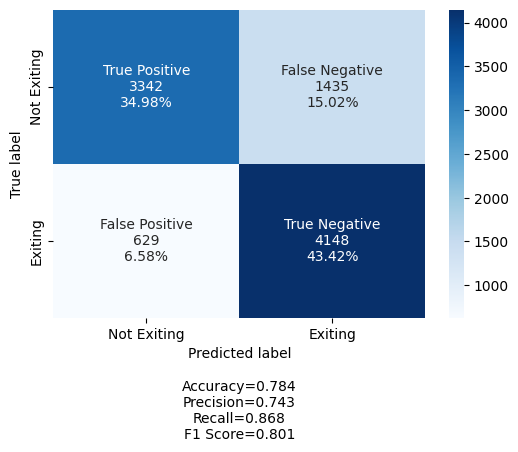

In [375]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

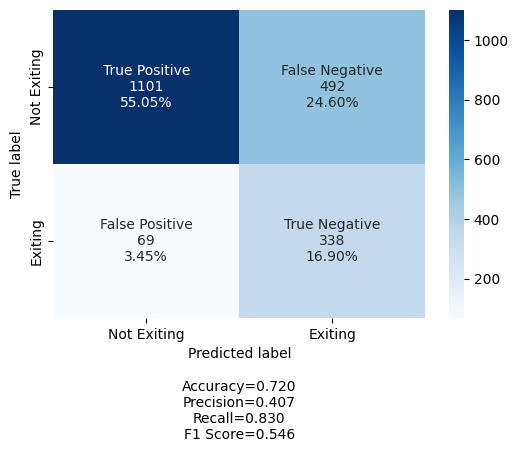

In [376]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* That showed some further improvement up to 87/83.
* Lets see if adjusting the epochs will help.

### Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01) + Batch (32) + Epochs 23

In [377]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [378]:
model_name = "Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01) + Batch (32) + Epochs 23"

In [379]:
#Initializing the model
adam_dropout_smote_model2c = Sequential()
adam_dropout_smote_model2c.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
adam_dropout_smote_model2c.add(Dropout(0.8))
adam_dropout_smote_model2c.add(Dense(32,activation='relu'))
adam_dropout_smote_model2c.add(Dropout(0.4))
adam_dropout_smote_model2c.add(Dense(16,activation='relu'))
adam_dropout_smote_model2c.add(Dropout(0.2))
adam_dropout_smote_model2c.add(Dense(8,activation='relu'))
adam_dropout_smote_model2c.add(Dropout(0.1))
adam_dropout_smote_model2c.add(Dense(1, activation = 'sigmoid'))

In [380]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [381]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_dropout_smote_model2c.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [382]:
adam_dropout_smote_model2c.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [383]:
adam_dropout_smote_history2c = adam_dropout_smote_model2c.fit(
    X_train_smote,y_train_smote,
    batch_size=32, 
    epochs=23,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6685 - recall: 0.5311 - val_loss: 0.5719 - val_recall: 0.7346
Epoch 2/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6080 - recall: 0.7243 - val_loss: 0.5628 - val_recall: 0.7322
Epoch 3/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5825 - recall: 0.6946 - val_loss: 0.5659 - val_recall: 0.7248
Epoch 4/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5829 - recall: 0.7207 - val_loss: 0.5347 - val_recall: 0.7052
Epoch 5/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5738 - recall: 0.7017 - val_loss: 0.5653 - val_recall: 0.7297
Epoch 6/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5572 - recall: 0.7008 - val_loss: 0.5469 - val_recall: 0.8084
Epoch 7/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5646 - recall: 0.7199 - val_loss: 0.5105 - val_recall: 0.7838
Epoch 8/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5562 - recall: 0.7194 - val_loss: 0.5553 - val_recall: 0.7690
Epoch 9/

**Loss function**

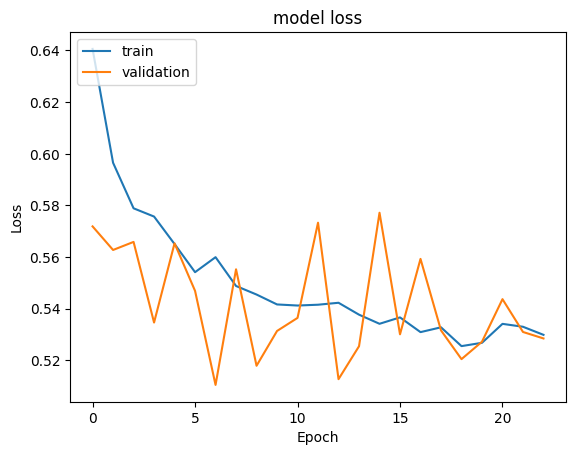

In [384]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_smote_history2c.history['loss'],adam_dropout_smote_history2c.history['val_loss'])

* The loss in the validation and train are divergent, and shows a bit of noise in both sets though much more extreme in validation. Convergence is close in the final epochs.

In [385]:
y_train_pred = adam_dropout_smote_model2c.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [386]:
y_val_pred = adam_dropout_smote_model2c.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [387]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.864559
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01) + Batch (32) + Epochs 23, dtype: float64
recall    0.847666
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01) + Batch (32) + Epochs 23, dtype: float64


**Classification report**

In [388]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76      4777
           1       0.74      0.86      0.80      4777

    accuracy                           0.78      9554
   macro avg       0.79      0.78      0.78      9554
weighted avg       0.79      0.78      0.78      9554



In [389]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80      1593
           1       0.41      0.85      0.55       407

    accuracy                           0.72      2000
   macro avg       0.68      0.77      0.67      2000
weighted avg       0.84      0.72      0.75      2000



**Confusion matrix**

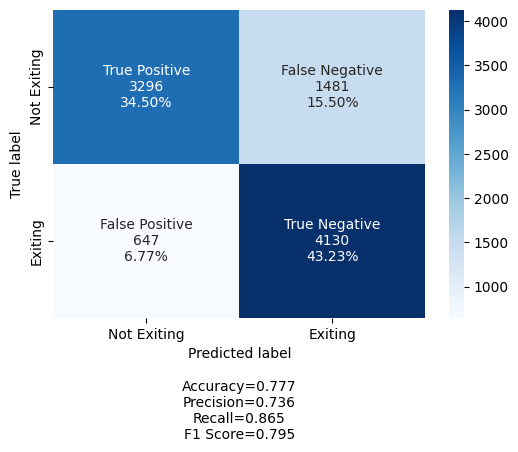

In [390]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

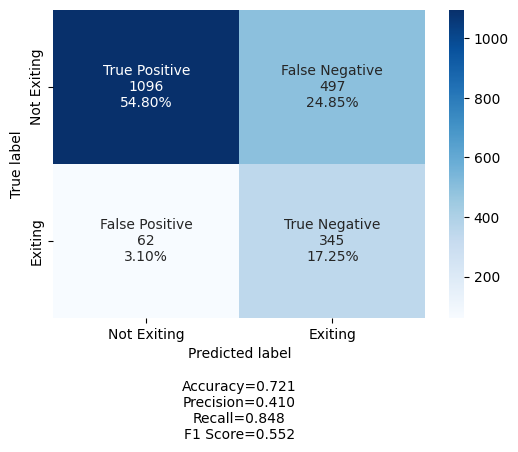

In [391]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Observations
* Training set dropped a little bit, but validation came up by almost 2 full points.
* Train and validation sets also have the least difference of any other model.
* This will be our final model.

## Model Performance Comparison and Final Model Selection

In [392]:
print("Training performance comparison")
training_metrics

Training performance comparison


recall
Neural Network (64,32,16,8) with SGD                0.429272
Neural Network (64,32,16,8) with SGD + Momentum...  0.518397
Neural Network (64,32,16,8) with Adam               0.651676
Neural Network (256,128,64,32,16,8) with Adam       0.806214
Neural Network (256,128,64,128,64,8) with Adam ...  0.876533
Neural Network (64,32,16,8) with Adam & Dropout...  0.510221
Neural Network (32,16,8) with Adam & Dropout (0...  0.420278
Neural Network (64,32) with Adam & Dropout (0.5...  0.348324
Neural Network (64,32,16,8) with Adam, He Norma...  0.376124
Neural Network (64,32,16,8) with Adam & Batch N...  0.683565
Neural Network (64,32,16,8) with Adam, Batch No...  0.413737
Neural Network (64,32,16,8) with SMOTE & SGD        0.805526
Neural Network (64,32,16,8) with SMOTE & Adam       0.941386
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.793804
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.793804
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.789617
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.748796
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.836090
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.868327
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.864559

In [393]:
print("Validation set performance comparison")
validation_metrics

Validation set performance comparison


recall
Neural Network (64,32,16,8) with SGD                0.398034
Neural Network (64,32,16,8) with SGD + Momentum...  0.405405
Neural Network (64,32,16,8) with Adam               0.479115
Neural Network (256,128,64,32,16,8) with Adam       0.491400
Neural Network (256,128,64,128,64,8) with Adam ...  0.457002
Neural Network (64,32,16,8) with Adam & Dropout...  0.474201
Neural Network (32,16,8) with Adam & Dropout (0...  0.383292
Neural Network (64,32) with Adam & Dropout (0.5...  0.304668
Neural Network (64,32,16,8) with Adam, He Norma...  0.331695
Neural Network (64,32,16,8) with Adam & Batch N...  0.461916
Neural Network (64,32,16,8) with Adam, Batch No...  0.366093
Neural Network (64,32,16,8) with SMOTE & SGD        0.727273
Neural Network (64,32,16,8) with SMOTE & Adam       0.651106
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.729730
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.729730
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.724816
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.678133
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.796069
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.830467
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.847666

In [394]:
# Compare diffs
training_metrics - validation_metrics

recall
Neural Network (64,32,16,8) with SGD                0.031238
Neural Network (64,32,16,8) with SGD + Momentum...  0.112992
Neural Network (64,32,16,8) with Adam               0.172561
Neural Network (256,128,64,32,16,8) with Adam       0.314814
Neural Network (256,128,64,128,64,8) with Adam ...  0.419531
Neural Network (64,32,16,8) with Adam & Dropout...  0.036019
Neural Network (32,16,8) with Adam & Dropout (0...  0.036986
Neural Network (64,32) with Adam & Dropout (0.5...  0.043655
Neural Network (64,32,16,8) with Adam, He Norma...  0.044429
Neural Network (64,32,16,8) with Adam & Batch N...  0.221649
Neural Network (64,32,16,8) with Adam, Batch No...  0.047643
Neural Network (64,32,16,8) with SMOTE & SGD        0.078254
Neural Network (64,32,16,8) with SMOTE & Adam       0.290280
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.064074
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.064074
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.064801
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.070664
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.040021
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.037861
Neural Network (64,32,16,8) with SMOTE,Adam & D...  0.016893

### Observations
#### Training data
* Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01) + Batch (32) at 86.8%
* Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01) + Batch (32) + Epochs 23 at 86.4%
#### Validation data
* While epochs 50 version performs better in training, the epochs 23 version beats it in validation set at 84.7% to 83%.
* Epochs 23 version also is much closer in the 2 values at 1.7% difference vs 3.8% difference.
#### Conclusion
* For this reason, the Epochs 23 version is our final model selection.

## Final Model

In [395]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [396]:
model = "Final Model: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01) + Batch (32) + Epochs 23"

In [397]:
#Initializing the model
final_test_model = Sequential()
final_test_model.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
final_test_model.add(Dropout(0.8))
final_test_model.add(Dense(32,activation='relu'))
final_test_model.add(Dropout(0.4))
final_test_model.add(Dense(16,activation='relu'))
final_test_model.add(Dropout(0.2))
final_test_model.add(Dense(8,activation='relu'))
final_test_model.add(Dropout(0.1))
final_test_model.add(Dense(1, activation = 'sigmoid'))

In [398]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [399]:
# compile the model with binary cross entropy as loss function and recall as the metric
final_test_model.compile(loss='binary_crossentropy',optimizer=optimizer)

In [400]:
final_test_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [401]:
final_test_history = final_test_model.fit(
    X_train_smote,y_train_smote,
    batch_size=32, 
    epochs=23,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6685 - val_loss: 0.5719
Epoch 2/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6080 - val_loss: 0.5628
Epoch 3/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5825 - val_loss: 0.5659
Epoch 4/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5829 - val_loss: 0.5347
Epoch 5/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5738 - val_loss: 0.5653
Epoch 6/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5572 - val_loss: 0.5469
Epoch 7/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5646 - val_loss: 0.5105
Epoch 8/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5562 - val_loss: 0.5553
Epoch 9/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5507 - val_loss: 0.5179
Epoch 10/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5487 - val_loss: 0.5314
Epoch 11/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5452 - val_loss: 0.5365
Epoch 12/23
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

**Loss function**

**Classification report**

In [402]:
y_test_pred = final_test_model.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [403]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      1593
           1       0.39      0.84      0.53       407

    accuracy                           0.70      2000
   macro avg       0.67      0.75      0.66      2000
weighted avg       0.83      0.70      0.73      2000



**Confusion matrix**

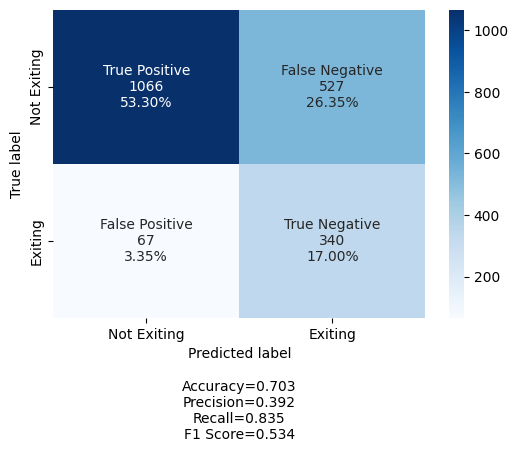

In [404]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

### Observations
* The majority of model gave recall between 50% to 80% with a few showing low recall in the 30-40% range.
* The data set was imbalanced, and had we had a better data set we might have improved performance even more. 
* By using oversampling we were able to improve the models significantly, but there was a lot of noise present in those models.

### Conclusion
* The best performing model is "Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.1) + LR (0.01) + Batch (32) + Epochs 23", where we used oversampling, a learning rate of 0.01 with the Adam optimizer, used aggressive dropout on each layer, and limited the epochs to 23.  While very noisy, This model gave us a recall of 83.5% on the test data set and a difference of 1.7% between the Training and Validation sets.
* By using this model, the bank can identify customers who are willing to leave the bank and enact an action plan to retain these customers.

### Business Recommendations
In our analysis, we found that customers who have less than 1 year or more than 9 of `Tenure` are more likely to churn. These could be newer customers lured in by a promotion recently and have no reason to remain loyal, or on the other end, customers who are now takign advantage of their credit history to move to a different card that offers some incentives. Some effort should be invested to try and improve these customers loyalty. Perhaps by offering lower interest rates (or promotional rates), or some other incentives, these customers would remain.

Customers with no `Balance` or a `Balance` between 100-150K are also more likely to churn. For the higher `Balance` customers this suggests that they may be outgrowing the need for credit cards or finding alternate solutions. The Bank should look for ways to engage these customers with targeted marketing.  Those with $0 `Balance` likely only have a credit card account  (backed up by the majority of customers having a single `NumOfProducts`) and so are not particularly tied to the bank. The Bank should focus effort on getting these customers into additional product relationships or offer promotional incentives to place money into an account.

Finally, customers who are inactive are more likely to churn, possibly indicating dissatisfaction or indifference, leading to closing of the account. The Bank should encourage these customers to utilize their card or other bank services more often to keep customers like this from departing.

In [405]:
print('\n'*10)

## Other models tried

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, Dropout  and LR (0.01)

In [406]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [407]:
model_name = "Neural Network (128,64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.2, 0.1) + LR (0.01)"

In [408]:
#Initializing the model
adam_dropout_smote_model3 = Sequential()
adam_dropout_smote_model3.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
adam_dropout_smote_model3.add(Dropout(0.8))
adam_dropout_smote_model3.add(Dense(64,activation='relu'))
adam_dropout_smote_model3.add(Dropout(0.4))
adam_dropout_smote_model3.add(Dense(32,activation='relu'))
adam_dropout_smote_model3.add(Dropout(0.2))
adam_dropout_smote_model3.add(Dense(16,activation='relu'))
adam_dropout_smote_model3.add(Dropout(0.2))
adam_dropout_smote_model3.add(Dense(8,activation='relu'))
adam_dropout_smote_model3.add(Dropout(0.1))
adam_dropout_smote_model3.add(Dense(1, activation = 'sigmoid'))

In [409]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# uncomment one of the following lines to define the metric to be used
metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [410]:
#  compile the model with binary cross entropy as loss function and recall as the metric
adam_dropout_smote_model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [411]:
adam_dropout_smote_model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

In [412]:
adam_dropout_smote_history3 = adam_dropout_smote_model3.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5878 - loss: 0.6655 - val_accuracy: 0.7315 - val_loss: 0.5162
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - loss: 0.5857 - val_accuracy: 0.7595 - val_loss: 0.5130
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7089 - loss: 0.5835 - val_accuracy: 0.7405 - val_loss: 0.4941
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7245 - loss: 0.5664 - val_accuracy: 0.7290 - val_loss: 0.4787
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7235 - loss: 0.5569 - val_accuracy: 0.7200 - val_loss: 0.5031
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7263 - loss: 0.5517 - val_accuracy: 0.7145 - val_loss: 0.4965
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7404 - loss: 0.5383 - val_accuracy: 0.7285 - val_loss: 0.4749
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7472 - loss: 0.5249 - val_accuracy: 0.

**Loss function**

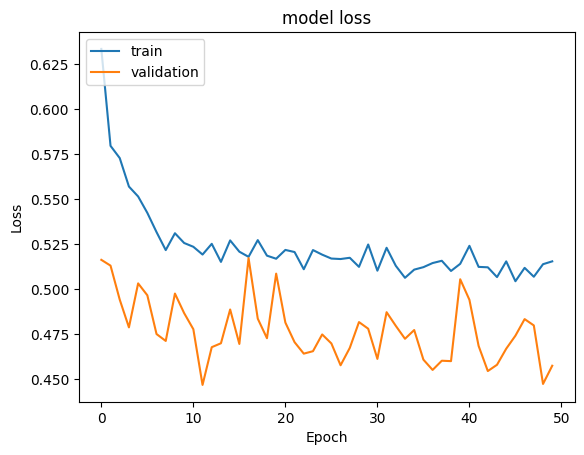

In [413]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_smote_history3.history['loss'],adam_dropout_smote_history3.history['val_loss'])

In [414]:
y_train_pred = adam_dropout_smote_model3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [415]:
y_val_pred = adam_dropout_smote_model3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [416]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.779987
Name: Neural Network (128,64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.2, 0.1) + LR (0.01), dtype: float64
recall    0.737101
Name: Neural Network (128,64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.2, 0.1) + LR (0.01), dtype: float64


**Classification report**

In [417]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      4777
           1       0.80      0.78      0.79      4777

    accuracy                           0.79      9554
   macro avg       0.79      0.79      0.79      9554
weighted avg       0.79      0.79      0.79      9554



In [418]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.48      0.74      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



**Confusion matrix**

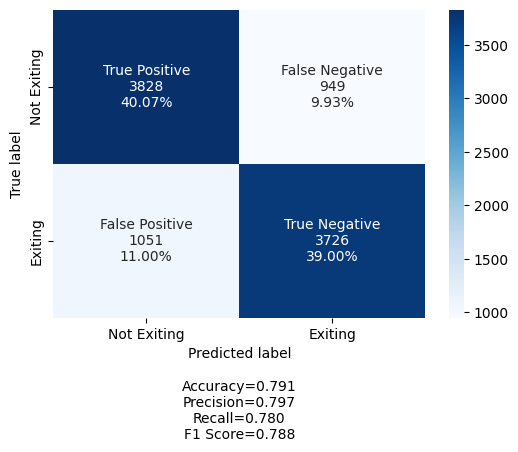

In [419]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

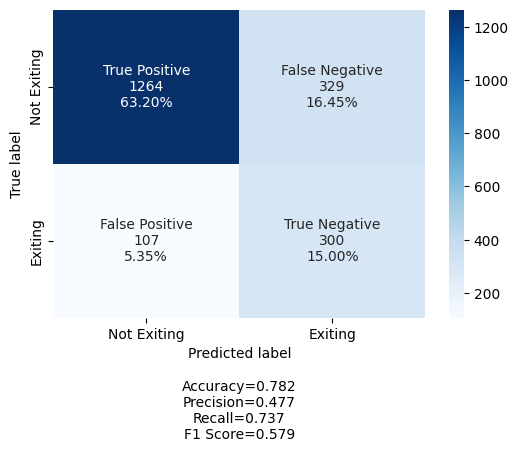

In [420]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network (64,32,16,8) with SMOTE, Adam & Dropout (0.8, 0.4, 0.2, 0.2, 0.2) + LR (0.003)

In [421]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

batch_size_opt= 32
epochs_opt = 50

#Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.2)
print(X_train_smote.shape[1])

11


In [422]:
model_name = "Neural Network (64,32,16,8) with SMOTE, Adam & Dropout (0.8, 0.4, 0.2, 0.2, 0.2) + LR (0.003)"

In [423]:
#Initializing the model
adam_dropout_smote_model4 = Sequential()
adam_dropout_smote_model4.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
adam_dropout_smote_model4.add(Dropout(0.8))
adam_dropout_smote_model4.add(Dense(32,activation='relu'))
adam_dropout_smote_model4.add(Dropout(0.4))
adam_dropout_smote_model4.add(Dense(16,activation='relu'))
adam_dropout_smote_model4.add(Dropout(0.2))
adam_dropout_smote_model4.add(Dense(8,activation='relu'))
adam_dropout_smote_model4.add(Dropout(0.2))
adam_dropout_smote_model4.add(Dense(1, activation = 'sigmoid'))

In [424]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)

# uncomment one of the following lines to define the metric to be used
metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [425]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_dropout_smote_model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [426]:
adam_dropout_smote_model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [427]:
adam_dropout_smote_history4 = adam_dropout_smote_model4.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size_opt, 
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5472 - loss: 0.6852 - val_accuracy: 0.7180 - val_loss: 0.5740
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6804 - loss: 0.6245 - val_accuracy: 0.7025 - val_loss: 0.5768
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6957 - loss: 0.5968 - val_accuracy: 0.7140 - val_loss: 0.5534
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7146 - loss: 0.5799 - val_accuracy: 0.7125 - val_loss: 0.5584
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7206 - loss: 0.5689 - val_accuracy: 0.7170 - val_loss: 0.5222
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7231 - loss: 0.5554 - val_accuracy: 0.7165 - val_loss: 0.5237
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7407 - loss: 0.5478 - val_accuracy: 0.7310 - val_loss: 0.5103
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7372 - loss: 0.5396 - val_accuracy: 0.

**Loss function**

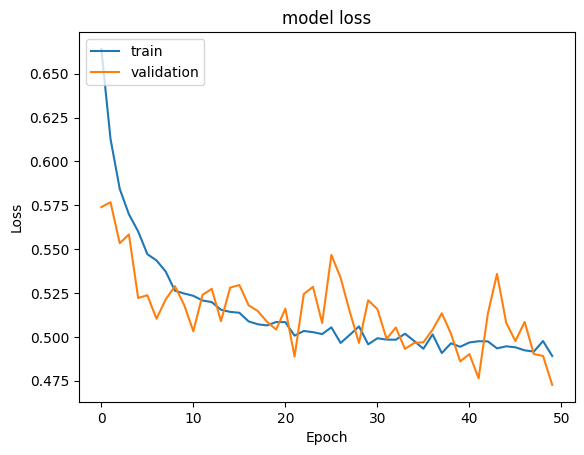

In [428]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_smote_history4.history['loss'],adam_dropout_smote_history4.history['val_loss'])

In [429]:
y_train_pred = adam_dropout_smote_model4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [430]:
y_val_pred = adam_dropout_smote_model4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [431]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.753192
Name: Neural Network (64,32,16,8) with SMOTE, Adam & Dropout (0.8, 0.4, 0.2, 0.2, 0.2) + LR (0.003), dtype: float64
recall    0.692875
Name: Neural Network (64,32,16,8) with SMOTE, Adam & Dropout (0.8, 0.4, 0.2, 0.2, 0.2) + LR (0.003), dtype: float64


**Classification report**

In [432]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      4777
           1       0.82      0.75      0.79      4777

    accuracy                           0.80      9554
   macro avg       0.80      0.80      0.80      9554
weighted avg       0.80      0.80      0.80      9554



In [433]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1593
           1       0.51      0.69      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000



**Confusion matrix**

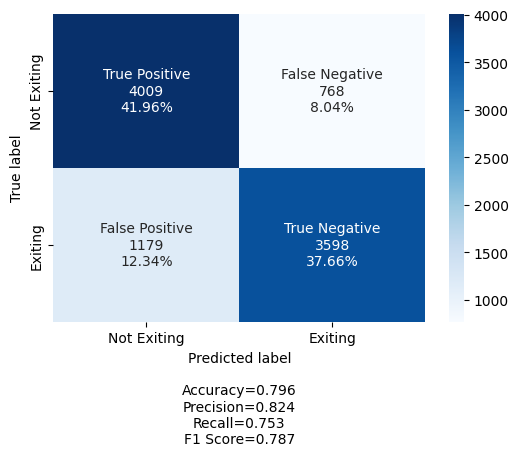

In [434]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

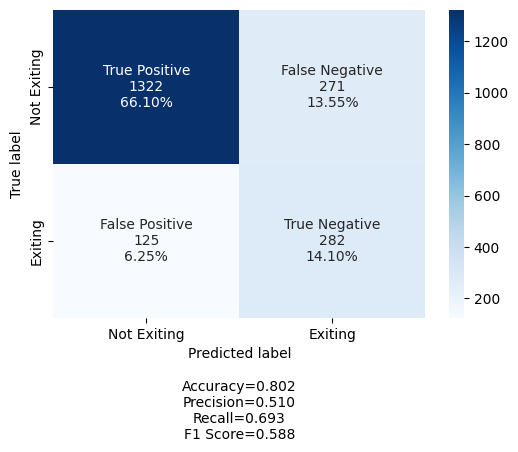

In [435]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, Dropout, Adjusting LR and Batch size

In [436]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [437]:
model_name = "Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.2) + LR (0.01) + Batch (32)"

In [438]:
#Initializing the model
adam_dropout_smote_model2b = Sequential()
adam_dropout_smote_model2b.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
adam_dropout_smote_model2b.add(Dropout(0.8))
adam_dropout_smote_model2b.add(Dense(32,activation='relu'))
adam_dropout_smote_model2b.add(Dropout(0.4))
adam_dropout_smote_model2b.add(Dense(16,activation='relu'))
adam_dropout_smote_model2b.add(Dropout(0.2))
adam_dropout_smote_model2b.add(Dense(8,activation='relu'))
adam_dropout_smote_model2b.add(Dropout(0.2))
adam_dropout_smote_model2b.add(Dense(1, activation = 'sigmoid'))

In [439]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [440]:
# compile the model with binary cross entropy as loss function and recall as the metric
adam_dropout_smote_model2b.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [441]:
adam_dropout_smote_model2b.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [442]:
adam_dropout_smote_history2b = adam_dropout_smote_model2b.fit(
    X_train_smote,y_train_smote,
    batch_size=32, 
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6699 - recall: 0.5114 - val_loss: 0.5946 - val_recall: 0.7666
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6169 - recall: 0.7236 - val_loss: 0.5770 - val_recall: 0.7764
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5914 - recall: 0.7060 - val_loss: 0.5366 - val_recall: 0.7912
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5888 - recall: 0.7379 - val_loss: 0.5668 - val_recall: 0.8452
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5746 - recall: 0.7198 - val_loss: 0.5906 - val_recall: 0.8157
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5612 - recall: 0.7184 - val_loss: 0.5411 - val_recall: 0.8354
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5615 - recall: 0.7130 - val_loss: 0.5524 - val_recall: 0.8575
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5483 - recall: 0.7159 - val_loss: 0.5149 - val_recall: 0.8231
Epoch 9/

**Loss function**

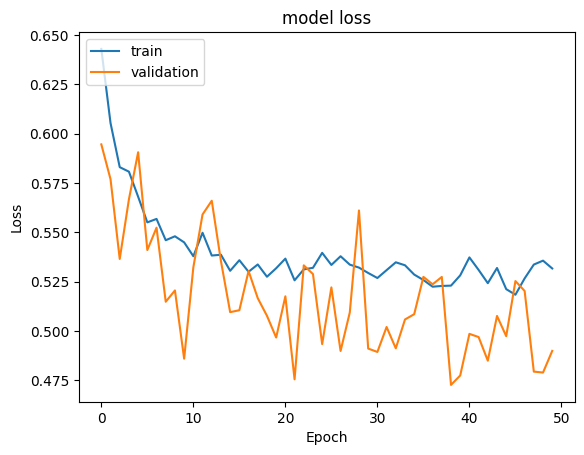

In [443]:
#Plotting Train Loss vs Validation Loss
plot_train_vs_val_loss(adam_dropout_smote_history2b.history['loss'],adam_dropout_smote_history2b.history['val_loss'])

In [444]:
y_train_pred = adam_dropout_smote_model2b.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [445]:
y_val_pred = adam_dropout_smote_model2b.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [446]:
#Save metrics for later comparison
training_metrics.loc[model_name] = recall_score(y_train_smote,y_train_pred)
validation_metrics.loc[model_name] = recall_score(y_val,y_val_pred)

print(training_metrics.loc[model_name])
print(validation_metrics.loc[model_name])

recall    0.840695
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.2) + LR (0.01) + Batch (32), dtype: float64
recall    0.793612
Name: Neural Network (64,32,16,8) with SMOTE,Adam & Dropout (0.8, 0.4, 0.2, 0.2) + LR (0.01) + Batch (32), dtype: float64


**Classification report**

In [447]:
print(classification_report(y_train_smote,y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      4777
           1       0.76      0.84      0.80      4777

    accuracy                           0.79      9554
   macro avg       0.79      0.79      0.79      9554
weighted avg       0.79      0.79      0.79      9554



In [448]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1593
           1       0.41      0.79      0.54       407

    accuracy                           0.73      2000
   macro avg       0.67      0.75      0.68      2000
weighted avg       0.83      0.73      0.75      2000



**Confusion matrix**

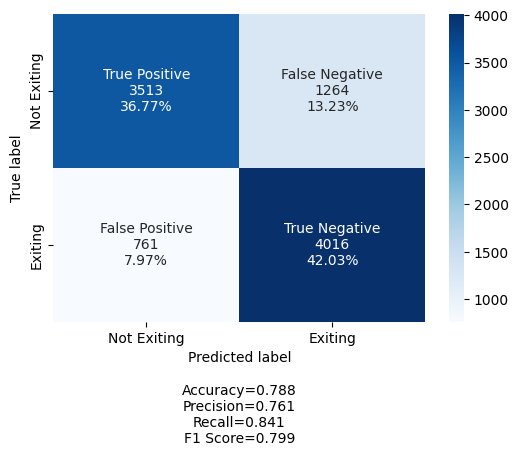

In [449]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

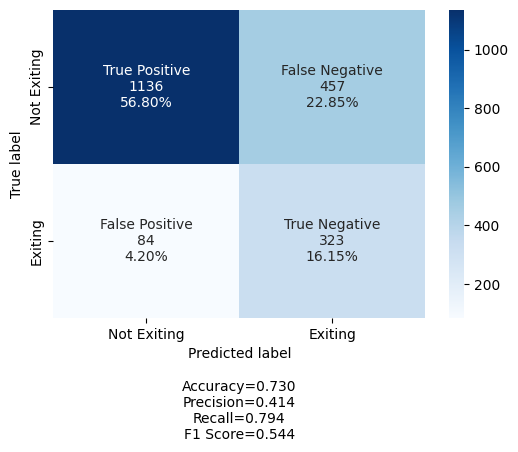

In [450]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)